<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

## <b>Lab 5: *Naive Bayes* & KNN</b>

### **Tenggat Waktu: 16 Maret 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab5_2200123456_TaylorSwift.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 16 Maret 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.
10. Kesalahan submisi merupakan tanggung jawab mahasiswa dan akan dikenakan penalti sesuai dengan ketentuan yang berlaku. Asisten dosen tidak menerima submisi di luar Scele.

# **Pernyataan Integritas**

In [180]:
# Isi dengan data diri Anda
NAMA = "Yoshelin Yamala Vijnana"
KELAS = "C"
NPM = "2206826702"
USERNAME_KAGGLE = "yoshelinyamala"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = ["-"]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["ChatGPT, Bing, Google, Stack Overflow"]

In [181]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Yoshelin Yamala Vijnana dari kelas C dengan NPM 2206826702, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Yoshelin Yamala Vijnana)


# <b>*Naive Bayes*</b>
---

## A. Pengenalan *Naive Bayes*

Pada lab kali ini, Anda akan mengimplementasikan **Naive Bayes Classifier** dan melakukan pengukuran kinerja model. Sebelum memulai implementasi, kita akan mempelajari konsep dasar dari **Naive Bayes Classifier** terlebih dahulu.

 Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah asumsi yg sangat kuat akan independensi dari masing-masing kondisi/kejadian.

Naive Bayes merupakan algoritma yang dikembangkan dari Teorema Bayes, yang memprediksi peluang suatu kejadian di masa depan berdasarkan data yang sudah ada. Ciri utama dari Naive Bayes Classifier adalah asumsi asumsi Naive Bayes untuk *class conditional density*, yaitu: “*features are conditionally independent given the class label*” (fitur-fitur dianggap independen secara kondisional jika label kelas diberikan).

> Referensi:<br>
> [Krisnadhi, A. A., Aminah, S., Azizah, A. Y., Cahyati, D., & Darari, F. (2024). *Probability, likelihood, and Naive Bayes* [Slide presentasi]. CSGE603130 - Kecerdasan Artifisial dan Sains Data Dasar, Fakultas Ilmu Komputer, Universitas Indonesia.](https://drive.google.com/file/d/104zMjysHrz5sTMrClQd9AImVxYK9LqWF/view?usp=sharing)

Bayangkan Anda ingin membangun sebuah classifier yang memprediksi golongan darah seseorang (A, B, AB, atau O) berdasarkan sifat-sifat kepribadiannya, seperti arogan, perhatian, teliti, humoris, sabar, dan sebagainya. Untuk melakukannya, Anda membuat sebuah kuesioner kepribadian dan mengumpulkan data dari banyak orang. Data ini kemudian digunakan untuk membentuk dataset yang akan menjadi dasar prediksi.

Misalkan seseorang, sebut saja Kak Lulu, mengisi kuesioner tersebut dan menyatakan bahwa dirinya adalah orang yang perhatian, humoris, teliti, dan sabar. Pertanyaannya, bisakah kita memprediksi golongan darah Kak Lulu berdasarkan data yang telah dikumpulkan?

Salah satu metode yang dapat digunakan untuk memprediksi golongan darah Kak Lulu adalah dengan **Teorema Naive Bayes**. Dengan menggunakan teorema ini, kita dapat menghitung probabilitas golongan darah Kak Lulu berdasarkan sifat-sifat kepribadian yang dimilikinya. Misalnya, jika kita ingin **menghitung peluang golongan darah Kak Lulu adalah O** karena **diketahui dia adalah orang yang perhatian**, kita dapat menggunakan Aturan Bayes seperti yang ditunjukkan di bawah ini.

$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O) \cdot p(O)}{p(\text{perhatian})} = \frac{p(\text{perhatian} \mid O) \cdot p(O)}{\sum_{c \in \{A, B, AB, O \}} p(\text{perhatian} \mid c) \cdot p(c)}
$$

Nilai-nilai tersebut merujuk pada komponen utama dalam Teorema Bayes, yaitu:

1. $p(O | \text{perhatian})$ merupakan ***Posterior Probability*** dari O (jika diketahui bersifat perhatian)
2. $p(O)$ merupakan ***Prior Probability*** dari O
3. $p(\text{perhatian} | O)$ merupakan ***Likelihood*** atau ***Class Conditional Density*** dari O
4. ${\sum_{c \in \{A, B, AB, O \}} p(\text{perhatian} \mid c).p(c)}$ merupakan ***Marginalizer*** dari $p(\text{perhatian})$

Ketiga nilai tersebut (prior, likelihood, dan marginal likelihood) bisa dihitung berdasarkan data yang dikumpulkan dari kuesioner. Umumnya, kita tidak hanya menghitung $P(O | \text{perhatian})$, tetapi juga menghitung $P(A | \text{perhatian})$, $P(B | \text{perhatian})$, dan $P(AB | \text{perhatian})$. Setelah keempat probabilitas posterior ini dihitung, golongan darah dengan probabilitas tertinggi akan diprediksi sebagai golongan darah Kak Lulu.

Namun, peneliti biasanya menginginkan rumus yang menggunakan jumlah variabel sesedikit mungkin. Jika kita perhatikan lebih lanjut, penyebut dari $p(O|\text{perhatian})$ dibagi oleh $p(\text{perhatian})$. Sama halnya dengan $p(A | \text{perhatian})$, $p(B | \text{perhatian})$, dan $P(AB | \text{perhatian})$ yang juga dibagi dengan $p(\text{perhatian})$ seperti yang dapat dilihat pada rumus-rumus di bawah ini.

$$
p(A \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid A).p(A)}{p(\text{perhatian})}
$$

<br>

$$
p(B \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid B).p(B)}{p(\text{perhatian})}
$$

<br>

$$
p(AB \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid AB).p(AB)}{p(\text{perhatian})}
$$

<br>

$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O).p(O)}{p(\text{perhatian})}
$$

Jika keempat probabilitas posterior di atas memiliki penyebut atau pembagi yang sama, yaitu $p(\text{perhatian})$, maka urutan nilai dari yang terbesar hingga terkecil **tidak akan berubah** meskipun penyebutnya diabaikan. Hal ini karena penyebut yang sama hanya berfungsi sebagai faktor penskalaan yang tidak memengaruhi urutan relatif antara probabilitas tersebut.

Dengan demikian, kita tidak perlu menghitung nilai $p(\text{perhatian})$ secara eksplisit. Sebagai gantinya, kita cukup membandingkan pembilangnya saja:

$$
p(O \mid \text{perhatian}) \propto p(\text{perhatian} \mid O) \cdot p(O)
$$

<br>

Di sini, $\propto$ berarti **proporsional terhadap** yang menggantikan $\frac{1}{p(\text{perhatian})}$. $\propto$ berarti *posterior* probabilitas itu **sebanding** dengan perkalian antara *likelihood*-nya dengan *prior*.

Nah, bagaimana faktor seperti humoris, teliti, sabar, atau sifat seseorang lainnya? Secara matematis, kita bisa membuatnya menjadi seperti ini.


$$
p(O \mid P,H,T,S) = \frac{p(P,H,T,S \mid O) \cdot p(O)}{p(P,H,T,S)}
$$

<br>

$$
p(O \mid P,H,T,S) \propto {p(P,H,T,S \mid O)p(O)}
$$

Ingat bahwa dalam Naive Bayes kita mengasumsikan bahwa setiap fitur dianggap independen secara kondisional jika label kelas diberikan. Dalam hal ini kita mengasumsikan bahwa faktor seperti perhatian, humoris, teliti, dan sabar bersifat ***conditionally independet*** apabila diketahui seseorang tersebut bergolongan darah O. Dengan demikian, kita bisa ubah rumusnya menjadi:

$$
p(O \mid P,H,T,S) \propto {p(P \mid O) \cdot p(H \mid O) \cdot p(H \mid O) \cdot p(T \mid O) \cdot p(S \mid O) \cdot p(O)}
$$

Keterangan :
- P: Perhatian
- H: Humoris
- T: Teliti
- S: Sabar
- O: Golongan darah O

## B. Pengenalan *Naive Bayes* Dalam Scikit-learn

Scikit-learn menyediakan beberapa variasi model naive bayes yang dapat digunakan, antara lain:

| Nama Model | Nama Modul |
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` |
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

Adapun kegunaan masing-masing model antara lain:
- Gaussian Naive Bayes,
Model ini cocok digunakan untuk data numerik yang mengikuti distribusi Gaussian (normal) dan bersifat kontinu.

- Multinomial Naive Bayes,
Model ini mengasumsikan bahwa data memiliki distribusi multinomial. Distribusi multinomial menggambarkan probabilitas dari jumlah data pada sejumlah kategori. Model ini cocok digunakan untuk fitur yang merepresentasikan jumlah atau frekuensi, seperti dalam klasifikasi teks. Contohnya adalah frekuensi kemunculan kata dalam dokumen.

- Complement Naive Bayes,
Complement Naive Bayes merupakan varian dari Multinomial Naive Bayes. Model ini dikembangkan untuk mengatasi kelemahan Multinomial Naive Bayes pada dataset yang **imbalanced** (tidak seimbang), di mana distribusi data tidak seragam. Complement Naive Bayes cocok digunakan untuk dataset dengan imbalanced class, karena mengurangi risiko overfitting terhadap class yang dominan. <br>
[Comparing a Variety of Naive Bayes Classification Algorithms](https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e)

- Bernoulli Naive Bayes,
Model ini mirip dengan Multinomial Naive Bayes, tetapi dirancang untuk data yang bersifat **binary** (0 atau 1). Contoh penggunaannya adalah pada data seperti gender (pria/wanita) atau representasi one-hot encoding. <br>
[Bernoulli Naive Bayes](https://iq.opengenus.org/bernoulli-naive-bayes/)

- Categorical Naive Bayes,
Model ini digunakan untuk data yang nilainya terdistribusi secara kategorikal. Jika data bersifat kontinu, perlu dilakukan transformasi ke bentuk diskret terlebih dahulu sebelum menggunakan model ini. Contoh penggunaannya adalah pada data seperti warna mata, ras, atau golongan darah.

Selengkapnya dapat dilihat pada dokumentasi modul [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## C. *Hands-on Naive Bayes*

Dataset `caesarian_section_classification.csv` berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting pada bidang medis.

Informasi dataset:
* `Age`: Umur
* `Delivery No`: Status (Timely, Premature, Latecomer)
* `Blood of Pressure`: Tekanan Darah (Low, Normal, High)
* `Heart Problem`: Memiliki masalah penyakit jantung (apt, inept)
* `Cesarian`: Dilakukan operasi caesar (Yes, No)

Sumber dataset: https://www.kaggle.com/amir75/caesarean-section-classification


### *Import Dataset*

In [182]:
# import library dan data
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

caesarian = pd.read_csv("caesarian_section_classification.csv")
# caesarian = pd.read_csv("https://drive.google.com/uc?export=download&id=1zu78EgJTrBmzz2TwXXyl_1sZz1Yiu3GZ")
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [183]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", caesarian.shape[0])
print("Kolom : ", caesarian.shape[1])

----Informasi Baris dan Kolom----
Baris :  80
Kolom :  5


In [184]:
# Mencari jumlah nilai unik pada kolom yang bertipe kategorikal

for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(caesarian[col].value_counts(), '\n')

No. of unique values in column Delivery No:
Delivery No
Timely       46
Premature    17
Latecomer    17
Name: count, dtype: int64 

No. of unique values in column Blood of Pressure:
Blood of Pressure
Normal    40
High      20
Low       20
Name: count, dtype: int64 

No. of unique values in column Heart Problem:
Heart Problem
apt      50
inept    30
Name: count, dtype: int64 

No. of unique values in column Caesarian:
Caesarian
Yes    46
No     34
Name: count, dtype: int64 



### *Preprocessing*

In [185]:
# mengecek nilai null pada data
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na * 100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [186]:
cek_null(caesarian)

Tidak ditemukan missing value pada dataset


In [188]:
# mengecek jumlah duplikasi pada data
print("Jumlah duplikasi data: " + str(caesarian.duplicated().sum()))

Jumlah duplikasi data: 8


Terdapat 8 data duplikat, maka kita perlu drop data tersebut terlebih dahulu.

In [189]:
caesarian.drop_duplicates(inplace = True)
caesarian.reset_index(drop=True, inplace=True)
print("Jumlah duplikasi data: " + str(caesarian.duplicated().sum()))

Jumlah duplikasi data: 0


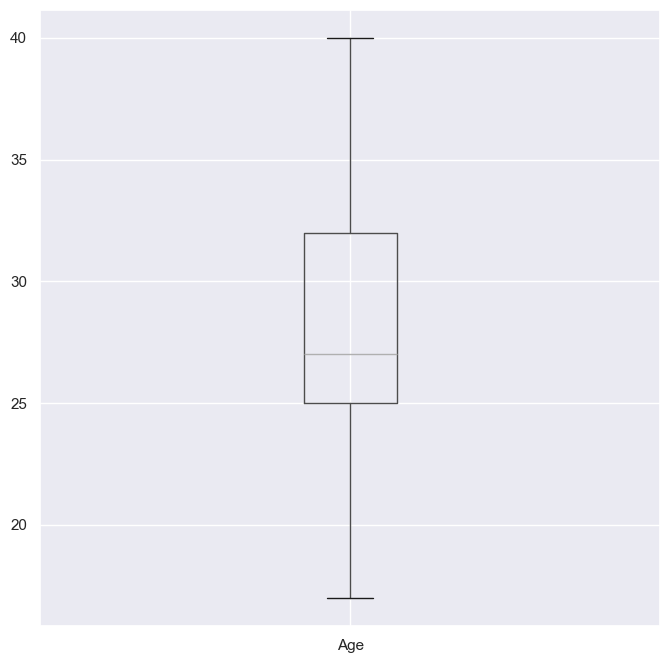

In [190]:
# mengecek keberadaan outlier
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
caesarian.boxplot(figsize=(8, 8))
plt.show()

Tidak tampak ada outlier pada data

### Menentukan *Independent Variable* dan *Dependent Variable*

Pada langkah ini, kita akan menentukan variabel independen (fitur) dan variabel dependen (target). Variabel dependen adalah variabel yang akan diprediksi, sedangkan variabel independen adalah variabel yang digunakan untuk membuat prediksi. Pada dataset ini, variabel **caesarian** dipilih sebagai variabel dependen, sedangkan variabel lainnya menjadi variabel independen.

Karena data yang diberikan bertipe kategorikal, maka kita perlu melakukan transformasi agar data dapat diolah oleh mesin. Ada beberapa teknik transformasi yang dapat dilakukan, diantaranya:
- One-hot encoding
- Label encoding
- Target encoding
- dan lain-lain. (Dapat dibaca slide kuliah Feature Engineering)

Teknik-teknik transformasi, memiliki kelebihan dan kelemahannya masing-masing (teman-teman mungkin bisa membacanya di internet terkait tujuan dari setiap teknik). Pada kasus ini, kita akan menggunakan **label encoding** karena teknik ini memastikan bahwa data kategorikal yang memiliki urutan (ordinal) dapat diproses dengan baik. Label encoding mengubah setiap kategori menjadi nilai numerik yang sesuai dengan urutan atau hierarki kategori tersebut.

**Catatan:**<br>
Pemilihan teknik transformasi sangat bergantung pada karakteristik data dan tujuan analisis. Pastikan untuk memilih teknik yang sesuai dengan data.

In [191]:

# Mapping untuk kolom Delivery No
delivery_mapping = {
	'Timely': 0,
	'Premature': 1,
	'Latecomer': 2
}

# Mapping untuk kolom Blood of Pressure
blood_pressure_mapping = {
	'Low': 0,
	'Normal': 1,
	'High': 2
}

# Mapping untuk kolom Heart Problem
heart_problem_mapping = {
	'apt': 0,
	'inept': 1
}

# Mapping untuk kolom Caesarian
caesarian_mapping = {
	'No': 0,
	'Yes': 1
}

caesarian_encoded = caesarian.copy()
caesarian_encoded['Delivery No'] = caesarian['Delivery No'].map(delivery_mapping)
caesarian_encoded['Blood of Pressure'] = caesarian['Blood of Pressure'].map(blood_pressure_mapping)
caesarian_encoded['Heart Problem'] = caesarian['Heart Problem'].map(heart_problem_mapping)
caesarian_encoded['Caesarian'] = caesarian['Caesarian'].map(caesarian_mapping)

caesarian_encoded.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,0,2,0,0
1,26,0,1,0,1
2,26,1,1,0,0
3,28,0,2,0,0
4,22,0,1,0,1


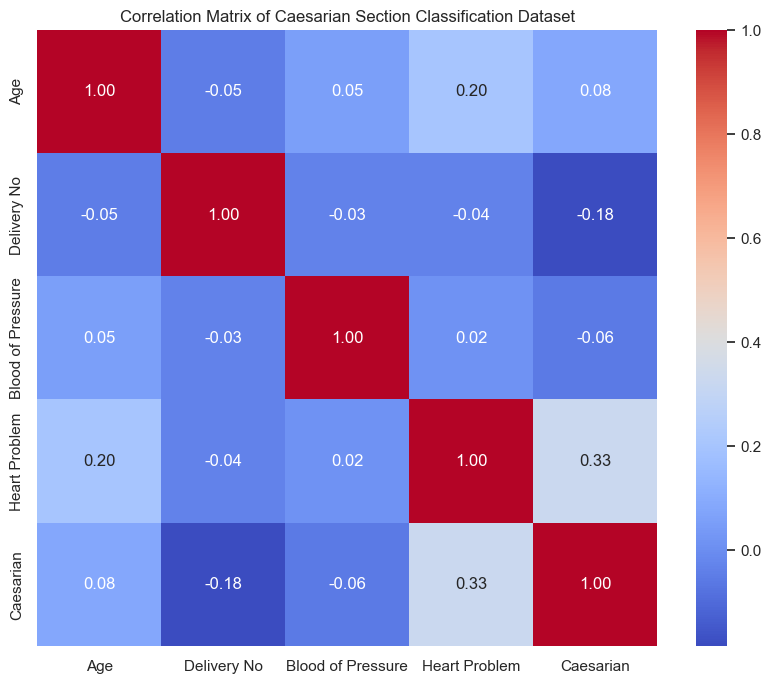

In [192]:
# Calculate the correlation matrix
correlation_matrix = caesarian_encoded.corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Caesarian Section Classification Dataset')
plt.show()

> Dapat dilihat bahwa korelasi setiap fitur terhadap target menunjukkan angka yang rendah. Hal ini sesuai dengan asumsi dalam Naive Bayes, yaitu setiap fitur independen secara kondisional jika label kelas diketahui.

In [193]:
# Variabel independen

X = caesarian_encoded.drop(["Caesarian", "Age"], axis = 1)
X.head()

,Delivery No,Blood of Pressure,Heart Problem
0,0,2,0
1,0,1,0
2,1,1,0
3,0,2,0
4,0,1,0


Kita drop kolom `Age` karena sebagian besar fitur lain merupakan fitur kategorikal sehingga kita akan menggunakan Categorical Naive Bayes.

In [194]:
# Variabel dependen

y = caesarian_encoded["Caesarian"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Caesarian, dtype: int64

### *Classification*

Klasifikasi menggunakan Naive Bayes dapat dilakukan dengan memanfaatkan package `sklearn`. Dalam proses ini, kita membutuhkan data training dan data testing. Kita akan mengambil **20%** dari data sebagai data testing dan sisanya akan menjadi data training. Berikut adalah kode program untuk membagi data menjadi data training dan testing:

In [195]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Melakukan splitting terhadap data train dan test (0.2 test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Selanjutnya, kita akan melakukan cross-validation dengan `n_splits=5`. Cross-validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini membantu menghasilkan model yang lebih stabil performanya dan menghindari overfitting.

In [196]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Setelah itu, kita akan mengaktifkan fungsi klasifikasi Naive Bayes, mengevaluasi hasil cross-validation, dan melatih model menggunakan data training.

In [197]:
from sklearn.naive_bayes import CategoricalNB

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = CategoricalNB()

In [198]:
# Melakukan evaluasi cross-validation
scores = cross_val_score(modelnb, X_train, y_train, cv=kfold)

In [199]:
# Menampilkan skor dari setiap fold
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.75       0.58333333 0.63636364 0.63636364 0.45454545]
Mean accuracy: 0.6121212121212121


Dari hasil cross-validation, terlihat bahwa skor akurasi bervariasi di setiap fold, dengan rata-rata 0.612.

Selanjutnya, kita akan melatih model menggunakan data training dan melakukan prediksi pada data testing.

In [200]:
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(X_train, y_train)

CategoricalNB()

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test.

In [201]:
# Prediksi data test

y_pred = modelnb.predict(X_test)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [0 1 1 1 1 1 0 0 0 1 1 1 0 1 1]


Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [202]:
# Array data test
print("Actual:", np.array(y_test))

Actual: [1 1 1 0 0 1 0 0 0 1 1 1 1 1 0]


### *Classification Report*

Setelah model dilatih dan diuji, kita perlu mengevaluasi performanya. Beberapa metrik yang digunakan adalah **accuracy**, **precision**, **recall**, dan **f1-score**. Selain itu, kita juga akan menampilkan confusion matrix untuk melihat ketepatan prediksi secara detail.

In [203]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

def evaluate_classifier_performance(prediction, y_test):

    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report:\n")
    print(classification_report(y_test, prediction, zero_division=0))
    print()

    # Confusion Matrix
    print("Confusion Matrix:")
    y_actual = pd.Series(np.array(y_test), name="actual")
    y_pred = pd.Series(np.array(prediction), name="prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()

    # Informasi lengkap
    print("Butuh informasi lebih lengkap? Silakan simak di bawah ini:")
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro', zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro', zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro', zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro', zero_division=0))

In [204]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.70      0.78      0.74         9

    accuracy                           0.67        15
   macro avg       0.65      0.64      0.64        15
weighted avg       0.66      0.67      0.66        15


Confusion Matrix:


prediction,0,1
actual,,
0,3,3
1,2,7



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6666666666666666
F1 Macro Average: 0.6411483253588517
F1 Micro Average: 0.6666666666666666
Precision Macro Average: 0.6499999999999999
Precision Micro Average: 0.6666666666666666
Recall Macro Average: 0.6388888888888888
Recall Micro Average: 0.6666666666666666


Berdasarkan hasil evaluasi, performa model tidak terlalu baik. Hal ini terlihat dari nilai **accuracy** dan metrik lainnya yang rendah. Beberapa kemungkinan penyebabnya adalah:
1. Dataset yang Tidak Seimbang<br>
Perbandingan jumlah tiap kelas dalam dataset tidak seimbang, menyebabkan model cenderung bias terhadap kelas yang lebih dominan.
2. Pemilihan Algoritma yang Kurang Sesuai <br>
Algoritma Naive Bayes mungkin tidak cocok untuk karakteristik data yang dimiliki. Beberapa algoritma hanya bekerja optimal pada distribusi data tertentu.

### <b>Pendekatan Lain</b>
Pendekatan yang lebih kompleks dalam menerapkan Naive Bayes adalah dengan memisahkan fitur numerik dan kategorik, lalu melatih dua model Naive Bayes yang berbeda sesuai dengan jenis datanya. Gaussian Naive Bayes untuk fitur numerik dan Categorical Naive Bayes untuk fitur kategorik. Setelah kedua model dilatih, hasil prediksi probabilitasnya dapat digabungkan dengan mengalikan nilai probabilitas dari masing-masing model, dengan asumsi bahwa fitur-fitur tersebut bersifat independen. Strategi ini memungkinkan pemrosesan data yang lebih sesuai dengan karakteristiknya masing-masing sehingga mahasiswa dapat bereksperimen dan mengevaluasi efektivitas pendekatan ini dalam meningkatkan performa klasifikasi.

# **KNN (K-Nearest Neighbor)**
---

## A. Pengenalan KNN

Sesuai dengan namanya (*nearest neighbors*), algoritma KNN mengklasifikasikan suatu data baru dengan melihat kedekatan data tersebut terhadap data lama yang telah ada. Contohnya, jika Anda memiliki dataset yang berisi informasi rumah dengan label **rumah mewah** dan **rumah tidak mewah**, KNN akan menyimpan informasi mengenai kemiripan fitur-fitur seperti luas rumah dan harga rumah. Ketika data rumah baru dimasukkan, KNN akan mengecek kesamaan fitur-fitur tersebut terhadap data lama yang telah dipelajari. Hasil pengecekan ini akan digunakan untuk menentukan klasifikasi rumah baru tersebut.

## B. Pengenalan KNN Dalam Scikit-learn

Pada library `scikit-learn`, terdapat beberapa parameter penting yang perlu diperhatikan saat mengimplementasikan algoritma KNN. Berikut adalah rangkuman singkatnya:

* `n_neighbors`  
	* Merepresentasikan jumlah **K** (tetangga terdekat) yang digunakan untuk menentukan klasifikasi. Nilai *default*: 5.
* `algorithm`  
	* Merepresentasikan algoritma yang digunakan untuk mencari tetangga terdekat.
	* Pilihan algoritma: `auto` (*default*), `ball_tree`, `kd_tree`, dan `brute`.
* `p`  
	* Merepresentasikan parameter untuk rumus jarak Minkowski.
	* Jika `p=1`, rumus jarak yang digunakan adalah Manhattan Distance.
	* Jika `p=2`, rumus jarak yang digunakan adalah Euclidean Distance (*default*).
* `metric`  
	* Merepresentasikan rumus jarak yang digunakan untuk menghitung kedekatan antara data point. Nilai *default*: `minkowski`.
	* Beberapa opsi rumus jarak yang tersedia: `euclidean`, `manhattan`, `cosine`, `jaccard`, `hamming`, dll.
	* Dokumentasi mengenai rumus jarak yang dapat digunakan dapat diakses di [sini](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics).

> Referensi: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Kita perlu memperhatikan rumus jarak yang digunakan dan juga jumlah K yang optimal. Strategi yang dapat diterapkan untuk mencari nilai K yang optimal adalah dengan **cross-validation**. Sedangkan untuk metric beserta parameternya bisa dipilih berdasarkan sifat data. Jika semua data numerik, kita bisa memilih untuk menggunakan **Euclidean** atau **Manhattan** distance. Jika semua data kategorikal, kita bisa menggunakan **Jaccard** distance.

Permasalahan yang sering ditemukan saat mengimplementasikan KNN adalah ketika variabel independen terdiri dari data **kategorikal** dan **numerik**. Banyak praktisi yang meyakini untuk menggunakan algoritma lain jika menemui masalah tersebut, seperti menggunakan algoritma **decision tree**, **random forest**, **neural network**, **deep learning**, dan lain-lain.

## C. *Hands-on* KNN

Selanjutnya, kita akan mencoba mengimplementasikan KNN untuk mengklasifikasikan jenis kaca yang harus digunakan berdasarkan dataset `glass_classification.csv` yang diambil dari [Glass Identification Data Set](https://www.kaggle.com/datasets/danushkumarv/glass-identification-data-set) dengan beberapa modifikasi.

Berikut adalah informasi dari dataset di atas:
- `RI`: Refractive Index
- `Na`: Sodium (unit measurement: weight percent in the corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K`: Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `type`: Type of glass


### *Import Dataset*

In [205]:
glass = pd.read_csv("glass_classification.csv").drop("Id", axis=1)
# glass = pd.read_csv("https://drive.google.com/uc?export=download&id=1OrumHSve0SHbb_XW-8slp12BT9U9jPMu").drop("Id", axis=1)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [206]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", glass.shape[0])
print("Kolom : ", glass.shape[1])

----Informasi Baris dan Kolom----
Baris :  214
Kolom :  10


### *Preprocessing*

In [208]:
cek_null(glass)

Tidak ditemukan missing value pada dataset


In [209]:
# mengecek jumlah duplikasi pada data
print("Jumlah duplikasi data: " + str(glass.duplicated().sum()))

Jumlah duplikasi data: 1


In [210]:
glass.drop_duplicates(inplace=True)
print("Jumlah duplikasi data: " + str(glass.duplicated().sum()))

Jumlah duplikasi data: 0


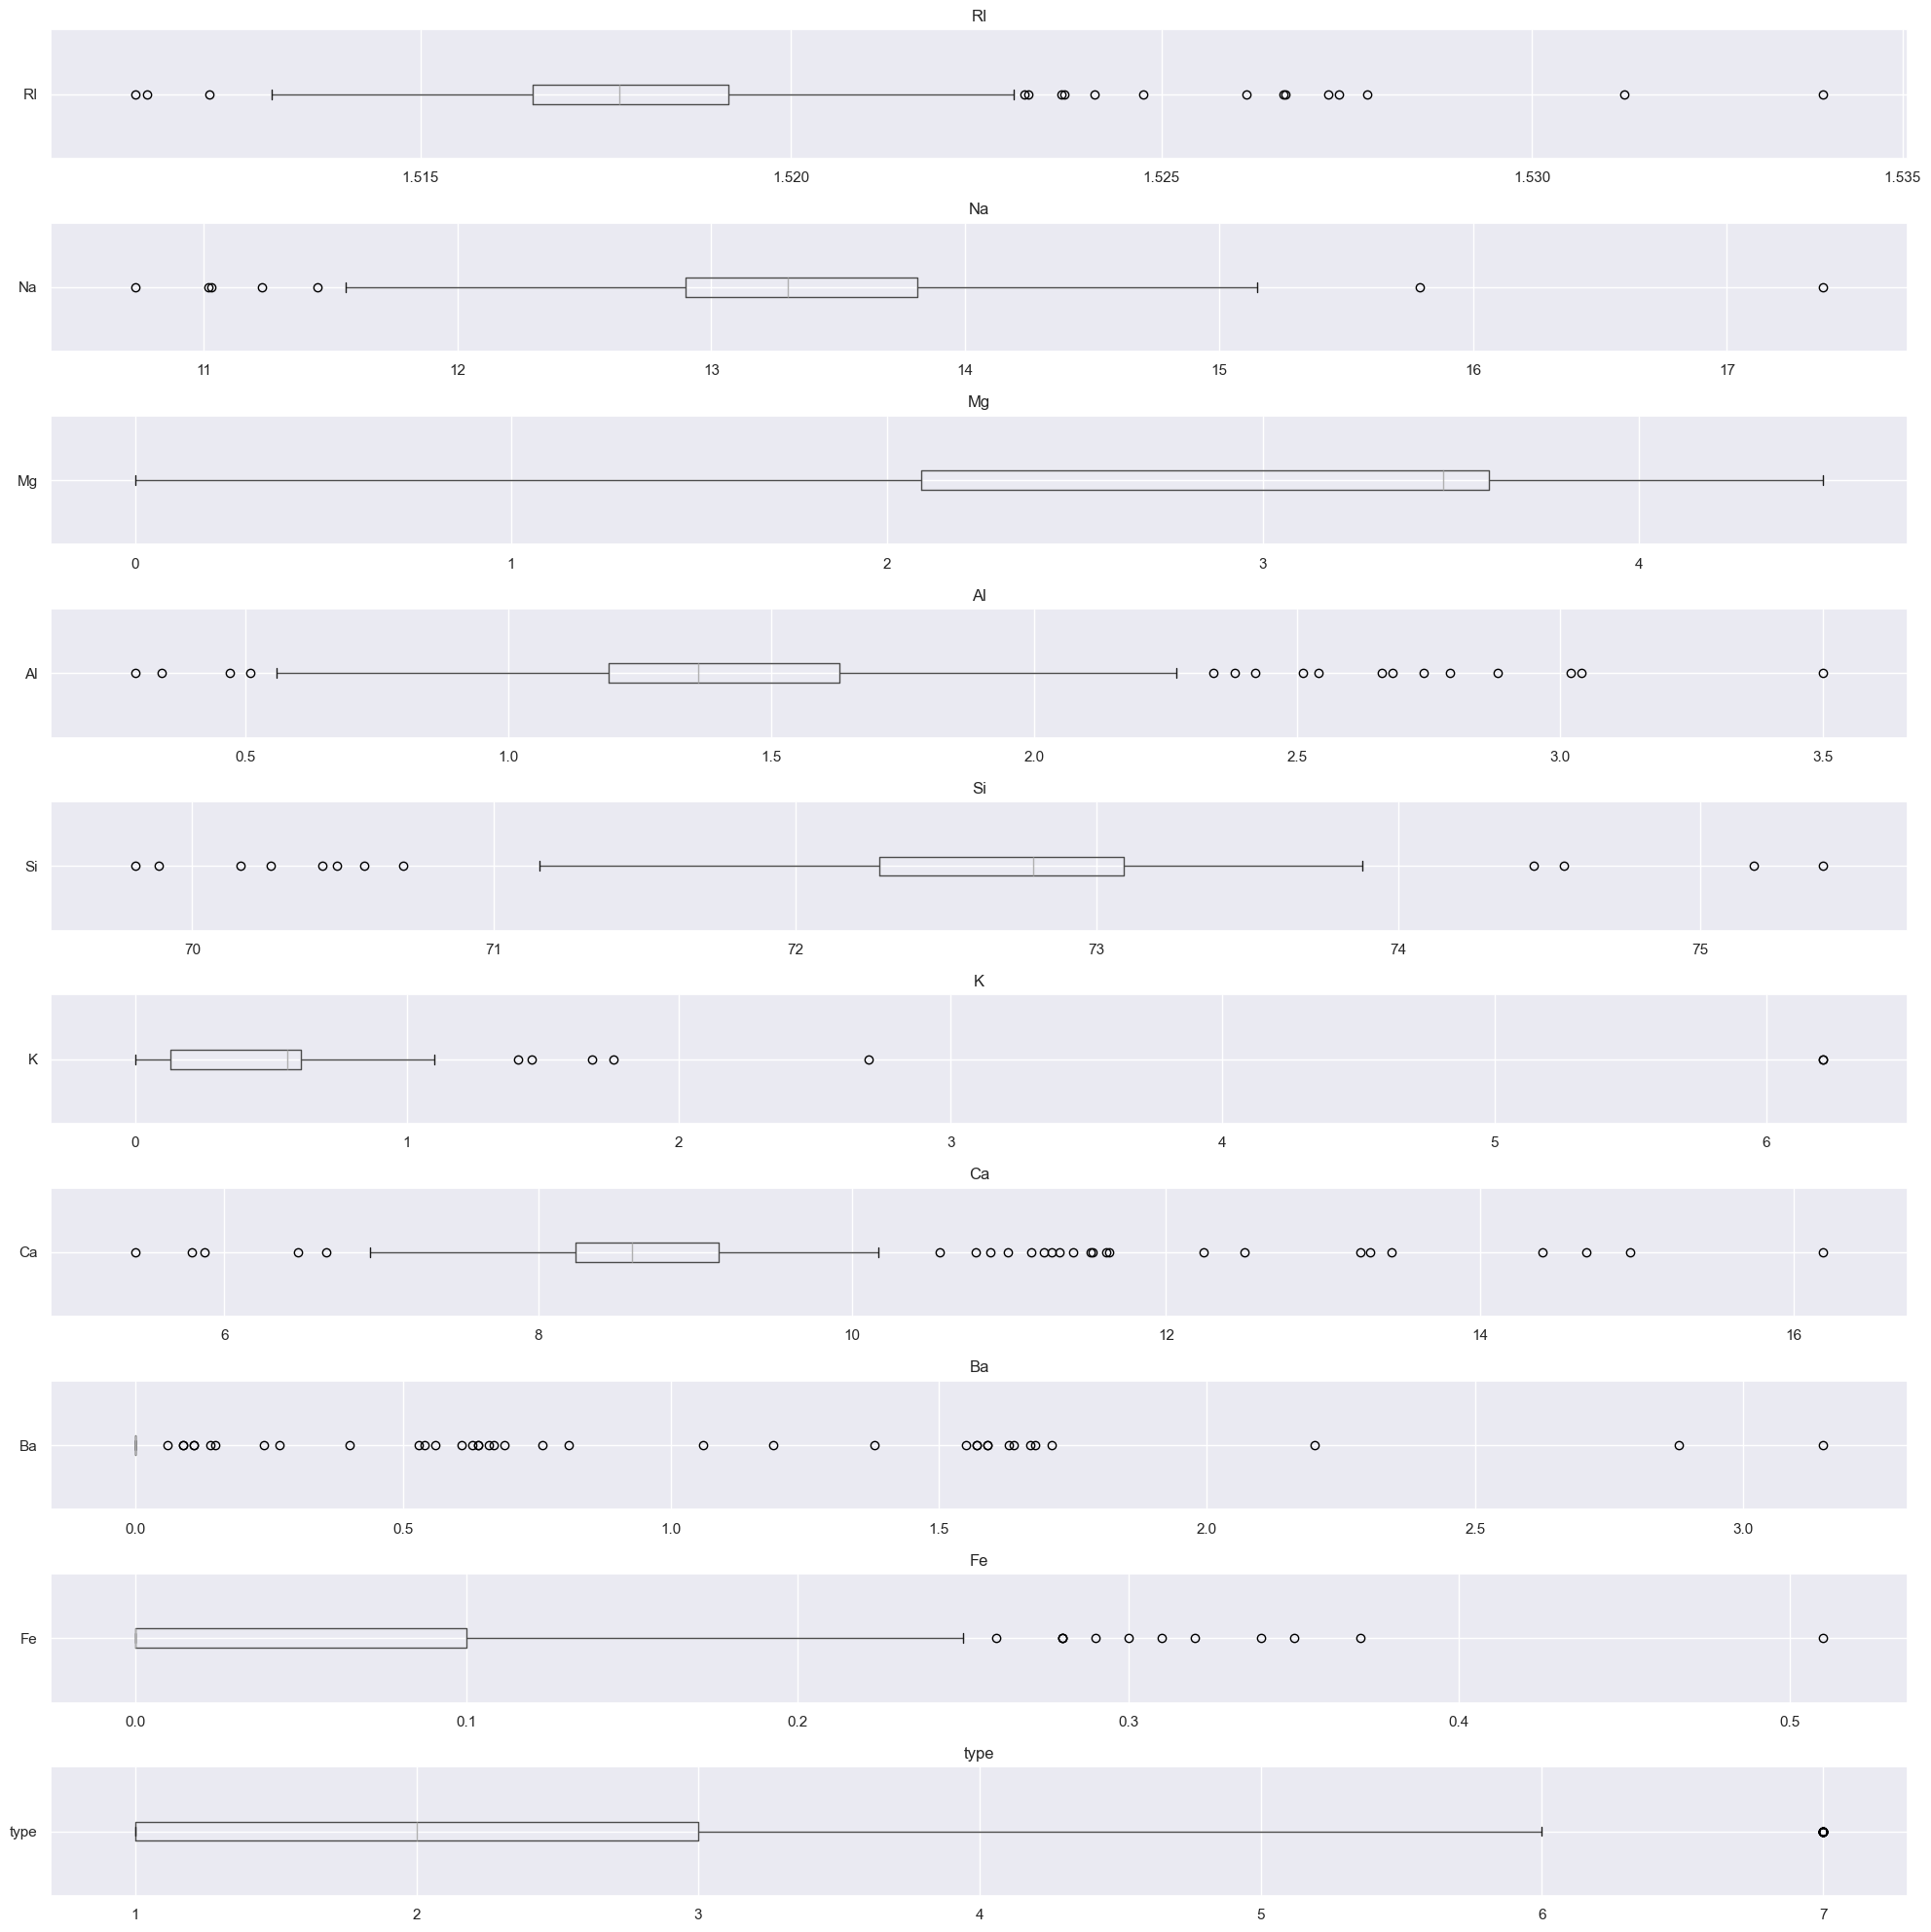

In [211]:
# mengecek keberadaan outlier

# Outliers
plt.figure(figsize=(20, 20))
numerical_columns = glass.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 1, i)
	glass.boxplot(column=column, vert=False)
	plt.title(column)
plt.tight_layout()
plt.show()

Pada boxplot di atas, terlihat bahwa jumlah outlier tidak terlalu banyak. Data juga cenderung normal, sehingga tidak perlu penanganan lebih lanjut terhadap outlier.

In [212]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [213]:
outliers = dict(check_outlier(glass).sum())

Outlier pada tiap atribut:
RI      17
Na       7
Mg       0
Al      17
Si      12
K        7
Ca      27
Ba      38
Fe      12
type    29
dtype: int64


Untuk kemudahan implementasi kita berasumsi bahwa *acceptance threshold* untuk outlier yang kita maklumi adalah 17 sehingga kita akan membuang kolom dengan jumlah outlier >= 17

In [214]:
drop_col = [key for key, val in outliers.items() if val >= 17]
drop_col.remove('type')
drop_col

['RI', 'Al', 'Ca', 'Ba']

In [215]:
glass = glass.drop(columns=drop_col)
glass.head()

,Na,Mg,Si,K,Fe,type
0,13.64,4.49,71.78,0.06,0.0,1
1,13.89,3.60,72.73,0.48,0.0,1
2,13.53,3.55,72.99,0.39,0.0,1
3,13.21,3.69,72.61,0.57,0.0,1
4,13.27,3.62,73.08,0.55,0.0,1


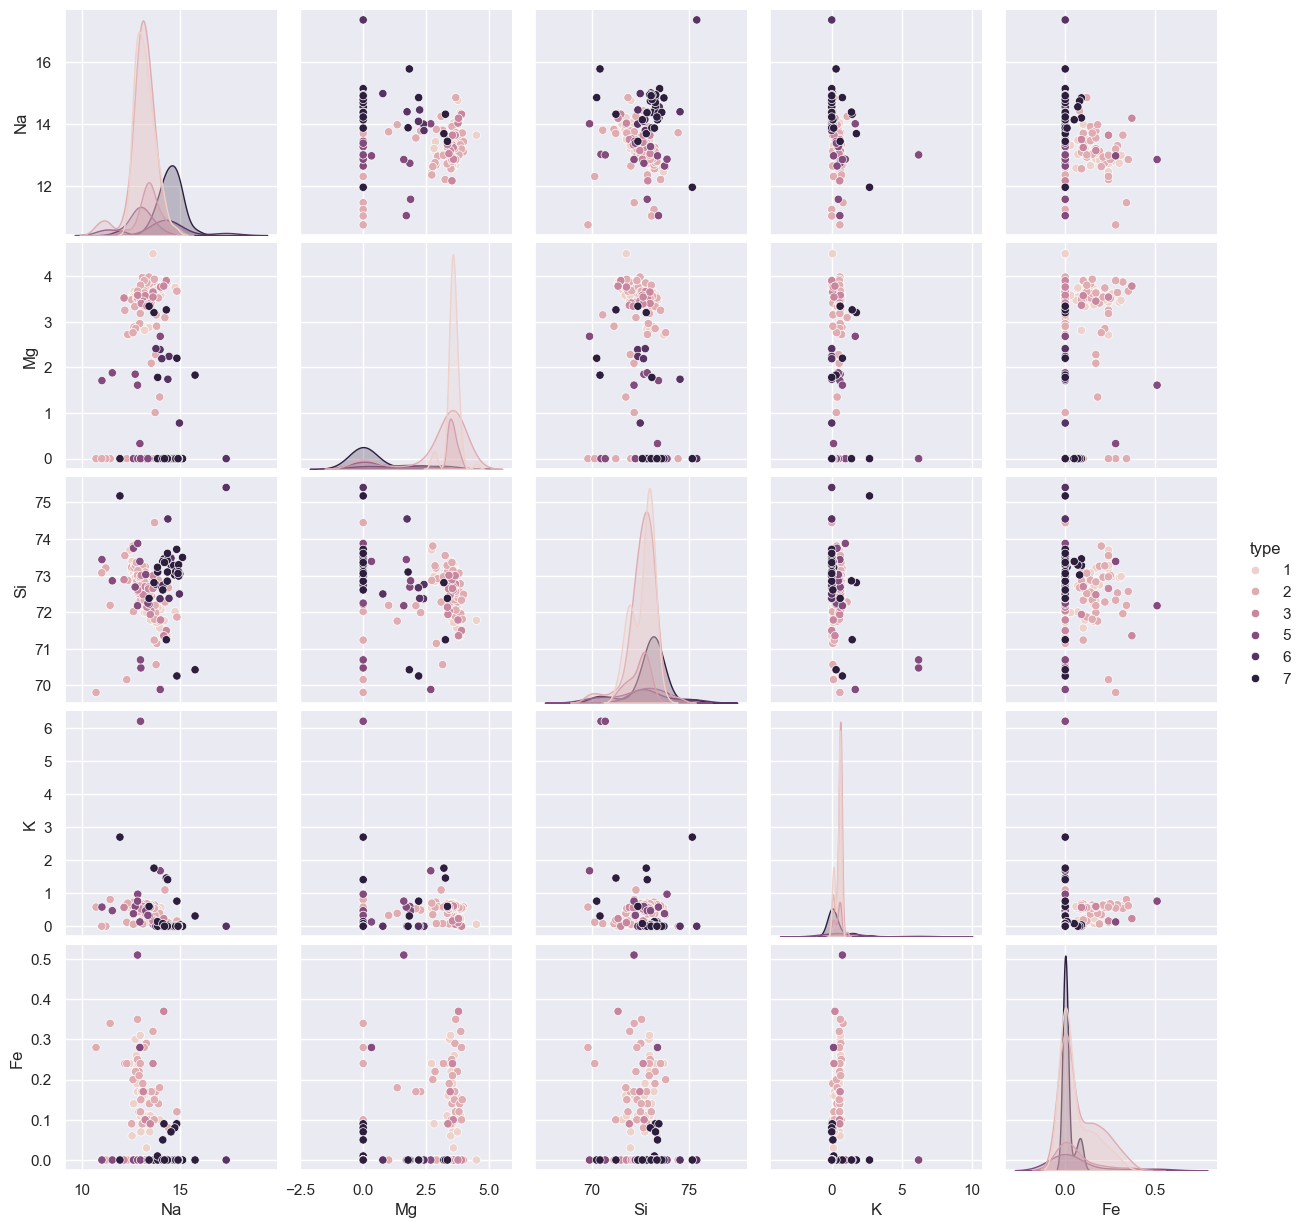

In [216]:
sns.set()
sns.pairplot(glass, hue ='type')
plt.show()

Berdasarkan plot diatas, terlihat bahwa distribusi nilai pada semua jenis obat hampir mendekati normal. Walaupun ada beberapa yang terlihat seperti bimodal, masih tetap bisa ditoleransi.

### Menentukan *Independent Variable* dan *Dependent Variable*

Dalam kasus ini, target prediksi kita adalah **type**, sehingga variabel **type** akan menjadi variabel dependen (target), sedangkan variabel lainnya akan menjadi variabel independen (fitur). Sebelum menentukan fitur yang akan digunakan dalam model, kita perlu melakukan ***feature selection*** untuk memilih variabel-variabel terbaik yang paling berpengaruh terhadap target.

> Dalam tahap ini, kita belum membahas secara mendalam mengenai feature selection atau feature engineering. Sementara itu, mahasiswa dapat mengikuti langkah-langkah yang diberikan pada lab

Karena data fitur kita bersifat numerik atau kontinu, dan data target kita kategorik, maka kita akan memilih strategi **ANOVA** atau *analysis of variance* dalam melakukan feature selection. Berikut adalah contohnya.

> Referensi: <br>
> https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [219]:
X_raw = glass.drop(["type"],axis=1)
y = glass["type"]

Kita akan memilih tiga variabel terbaik dari variabel independen (`X_raw`) untuk dilatih pada model. Berikut adalah contoh kodenya.

In [220]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=3)
X = selector.fit_transform(X_raw, y)

*Note*: <br>
Perhatikan, pemilihan fitur harus dilakukan secara terus menerus atau berulang dengan memperbaiki tahap sebelumnya. Jika teman-teman ingin mendapatkan model terbaik, teman-teman harus terus melakukan tahapan ini hingga teman-teman mendapatkan model yang terbaik.

In [221]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 5
Jumlah feature (setelah dilakukan feature selection ) : 3


In [222]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['Na', 'Mg', 'K'], dtype=object)

Dari hasil feature selection yang ada kita akan mengambil tiga fitur yaitu `Na`, `Mg`, dan `K`. Selanjutnya, kita akan melakukan *splitting data* yaitu membagi dataset menjadi *testing* dan *training* dengan ukuran yang sama seperti pada proses Naive Bayes. Berikut adalah caranya:

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

*Note*:<br>
`stratify=y` digunakan untuk memastikan proporsi kelas pada data training dan testing sama dengan dataset asli. Ini digunakan untuk dataset dengan distribusi kelas yang tidak seimbang (*imbalanced*).


Sebelum menerapkan algoritma KNN, penting untuk melakukan **standarisasi** atau **normalisasi** pada nilai-nilai independent variables (fitur). Hal ini sangat krusial karena KNN menggunakan perhitungan jarak (seperti Euclidean atau Manhattan) untuk menentukan tetangga terdekat. Jika fitur memiliki rentang nilai yang berbeda-beda, fitur dengan skala yang lebih besar akan mendominasi perhitungan jarak, sehingga mengganggu performa model.

Pada tahapan ini, kita akan memilih menggunakan normalisasi, berikut adalah caranya.

In [224]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### *Classification*

In [225]:
from sklearn.neighbors import KNeighborsClassifier

# Mengatur jumlah neighbor yang digunakan.
N_NEIGHBORS = 4

# Mengatur jumlah pelatihan pada fold fold yang ada.
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Anda dapat memilih rumus perhitungan jarak yang ingin digunakan dengan menambahkan parameter `metric` pada saat pembuatan model KNN. Secara *default*, jika tidak ditambahkan, nilai parameter tersebut adalah `minkowski`.

#### KNN dengan *Euclidian Distance*

In [226]:
KNN_euclidean = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='euclidean')
KNN_euclidean.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [227]:
scores = cross_val_score(KNN_euclidean, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.5882352941176471


In [229]:
y_pred = KNN_euclidean.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [7 5 1 5 2 1 2 2 1 2 3 1 7 6 1 7 7 1 1 5 1 1 7 2 1 1 7 7 2 1 1 1 1 1 1 1 1
 2 1 1 1 2 6]


In [230]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.50      0.79      0.61        14
           2       0.62      0.33      0.43        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.71      0.83      0.77         6

    accuracy                           0.63        43
   macro avg       0.81      0.71      0.72        43
weighted avg       0.67      0.63      0.61        43


Confusion Matrix:


prediction,1,2,3,5,6,7
actual,,,,,,
1,11,3,0,0,0,0
2,8,5,0,0,0,2
3,2,0,1,0,0,0
5,0,0,0,3,0,0
6,0,0,0,0,2,0
7,1,0,0,0,0,5



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.627906976744186
F1 Macro Average: 0.7191874148395887
F1 Micro Average: 0.627906976744186
Precision Macro Average: 0.8065476190476191
Precision Micro Average: 0.627906976744186
Recall Macro Average: 0.7142857142857143
Recall Micro Average: 0.627906976744186


#### KNN dengan *Manhattan Distance*

In [231]:
KNN_manhattan = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='manhattan')
KNN_manhattan.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [233]:
scores = cross_val_score(KNN_manhattan, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.6294117647058824


In [232]:
y_pred = KNN_manhattan.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [7 5 1 5 2 1 1 2 1 1 3 1 7 6 1 7 7 1 1 5 1 1 7 2 1 1 7 7 2 1 7 1 1 1 1 1 1
 2 1 1 1 2 6]


In [234]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.52      0.86      0.65        14
           2       0.67      0.27      0.38        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         6

    accuracy                           0.65        43
   macro avg       0.82      0.74      0.73        43
weighted avg       0.69      0.65      0.61        43


Confusion Matrix:


prediction,1,2,3,5,6,7
actual,,,,,,
1,12,2,0,0,0,0
2,9,4,0,0,0,2
3,2,0,1,0,0,0
5,0,0,0,3,0,0
6,0,0,0,0,2,0
7,0,0,0,0,0,6



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6511627906976745
F1 Macro Average: 0.731123981123981
F1 Micro Average: 0.6511627906976745
Precision Macro Average: 0.8230676328502415
Precision Micro Average: 0.6511627906976745
Recall Macro Average: 0.7428571428571429
Recall Micro Average: 0.6511627906976745


#### KNN dengan *Jaccard Similarity*

In [235]:
KNN_jaccard = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='jaccard')
KNN_jaccard.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='jaccard', n_neighbors=4)

In [236]:
scores = cross_val_score(KNN_jaccard, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.5


In [237]:
y_pred = KNN_jaccard.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [7 2 1 2 1 1 1 1 1 1 1 1 2 6 1 2 7 1 1 2 1 1 7 1 1 1 2 7 1 1 1 1 1 1 1 1 1
 1 1 1 1 7 6]


In [238]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.47      1.00      0.64        14
           2       0.17      0.07      0.10        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         2
           7       0.60      0.50      0.55         6

    accuracy                           0.47        43
   macro avg       0.37      0.43      0.38        43
weighted avg       0.34      0.47      0.36        43


Confusion Matrix:


prediction,1,2,6,7
actual,,,,
1,14,0,0,0
2,12,1,0,2
3,3,0,0,0
5,0,3,0,0
6,0,0,2,0
7,1,2,0,3



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.46511627906976744
F1 Macro Average: 0.3795093795093795
F1 Micro Average: 0.46511627906976744
Precision Macro Average: 0.37222222222222223
Precision Micro Average: 0.46511627906976744
Recall Macro Average: 0.42777777777777776
Recall Micro Average: 0.46511627906976744


Berdasarkan hasil evaluasi beberapa model di atas, terlihat bahwa model menghasilkan performa yang kurang optimal saat menggunakan metrik `Jaccard`. Hal ini terjadi karena metrik Jaccard umumnya digunakan untuk menghitung kesamaan (*similarity*) atau ketidaksamaan (*dissimilarity*) antara fitur-fitur yang bersifat biner atau kategorikal. Sementara itu, semua fitur dalam dataset kita sudah dalam bentuk numerik. Akibatnya, metrik Jaccard tidak cocok untuk menghitung jarak antara atribut-atribut numerik, sehingga berdampak pada kinerja model yang dihasilkan menjadi kurang baik.

### Hyperparameter Tuning

Seperti yang sudah dikatakan sebelumnya, dalam memilih nilai K yang terbaik kita perlu melakukan cross validation. Kita akan melakukan hal ini dengan hyperparameter tuning menggunakan bantuan grid search cv. Scoring yang akan kita gunakan pada fase tuning adalah accuracy, artinya adalah kita akan mengambil parameter terbaik yang memberikan nilai akurasi terbaik. Berikut adalah contohnya.

In [239]:
# Optimalisasi KNN dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# Parameter yang akan di-tuning
tunned_params = {
	'n_neighbors': list(range(1, 21)),
	'metric': ['euclidean', 'manhattan', 'jaccard']
}

In [ ]:
print("Tuning hyperparameters model KNN\n")

clfKNN = GridSearchCV(
	model,
	tunned_params,
	scoring="accuracy",
	cv=kfold,
	verbose=2
)

# Melatih model dengan data training
clfKNN.fit(X_train_scaled, y_train)

Tuning hyperparameters model KNN

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'jaccard'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy', verbose=2)

In [241]:
# Menampilkan parameter terbaik
print("\nBest parameters set found on development set:")
print(clfKNN.best_params_)


Best parameters set found on development set:
{'metric': 'manhattan', 'n_neighbors': 4}


In [242]:
# Evaluasi performa model dengan data testing
print("\nDetailed classification report:")
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)


Detailed classification report:
Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.52      0.86      0.65        14
           2       0.67      0.27      0.38        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         6

    accuracy                           0.65        43
   macro avg       0.82      0.74      0.73        43
weighted avg       0.69      0.65      0.61        43


Confusion Matrix:


prediction,1,2,3,5,6,7
actual,,,,,,
1,12,2,0,0,0,0
2,9,4,0,0,0,2
3,2,0,1,0,0,0
5,0,0,0,3,0,0
6,0,0,0,0,2,0
7,0,0,0,0,0,6



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6511627906976745
F1 Macro Average: 0.731123981123981
F1 Micro Average: 0.6511627906976745
Precision Macro Average: 0.8230676328502415
Precision Micro Average: 0.6511627906976745
Recall Macro Average: 0.7428571428571429
Recall Micro Average: 0.6511627906976745


Berdasarkan hasil di atas, kita memperoleh bahwa nilai k yang paling optimal adalah 4 dengan metric distance `Manhattan`.

Model ini mencapai akurasi lebih dari 60%, yang menunjukkan performa yang cukup baik. Selain itu, nilai F1 Micro dan Accuracy yang di atas 60% mengindikasikan bahwa model mampu mengurangi false positive dan false negative. Namun, masih ada ruang untuk perbaikan dalam meningkatkan kualitas prediksi.

# **Latihan Soal**
---

## <b>A. Latihan Implementasi</b>

Kita akan mencoba membuat model klasifikasi untuk kasus transaction fraud, berikut adalah penjelasan tiap atribut yang digunakan pada dataset ini. Dataset ini diambil dari [Kaggle](https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset) dengan modifikasi.

*Attribute Information*:
- `transaction_id`: Unique identifier for each transaction.
- `user_id`: Unique identifier for the user.
- `transaction_amount`: Amount of money involved in the transaction.
- `transaction_type`: Type of transaction (Online, In-Store, ATM, etc.).
- `account_balance`: User's current account balance before the transaction.
- `device_type`: Type of device used (Mobile, Desktop, etc.).
- `location`: Geographical location of the transaction.
- `merchant_category`: Type of merchant (Retail, Food, Travel, etc.).
- `ip_address_flag`: Whether the IP address was flagged as suspicious (0 or 1).
- `failed_transaction_count_7d`: Count of failed transactions in the past 7 days.
- `card_type`: Type of payment card used (Credit, Debit, Prepaid, etc.).
- `card_age`: Age of the card in months.
- `transaction_distance`: Distance between the user's usual location and transaction location.
- `authentication_method`: How the user authenticated (PIN, Biometric, etc.).
- `risk_score`: Fraud risk score computed for the transaction.
- `is_weekend`: Whether the transaction occurred on a weekend (0 or 1).
- `is_fraud`: Target variable (0 = Not Fraud, 1 = Fraud).

In [243]:
transaction = pd.read_csv("synthetic_fraud_dataset.csv")
# transaction = pd.read_csv("https://drive.google.com/uc?export=download&id=1qfoScqTMrbZh3iEKvJ0CM_kxNwOTnScP")
transaction.head()

,transaction_id,user_id,transaction_amount,transaction_type,account_balance,device_type,location,merchant_category,ip_address_flag,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,is_fraud
0,TXN_33553,USER_1834,39.79,POS,93213.17,Laptop,Sydney,Travel,0,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,NaN,POS,NaN,Mobile,NaN,Electronics,0,4,NaN,140,NaN,NaN,NaN,1,1


### **Deskripsi Soal**

Target klasifikasi kita adalah atribut `fraud`. Atribut tersebut terdiri atas nilai 1 atau 0, yang menyatakan apakah suatu transaksi adalah penipuan atau bukan.

Berikut adalah alur atau tahapan yang harus teman-teman kerjakan. Semangat!

### <b>Nomor 1</b> - <i>Preprocessing</i> [15]
Lakukan *preprocessing* pada dataset `transaction` sebelum melanjutkan ke tahap berikutnya. Untuk setiap subsoal, tuliskan juga alasan mengapa penanganan tersebut dilakukan.

#### a. <i>Missing Values</i>
Jika ditemukan *missing values*, lakukan penanganan yang tepat sesuai dengan asumsi Anda. Berikan alasan untuk setiap kolom yang ingin di-handle.

In [245]:
# Imputasi dengan Median
transaction['transaction_amount'] = transaction['transaction_amount'].fillna(transaction['transaction_amount'].median())
transaction['account_balance'] = transaction['account_balance'].fillna(transaction['account_balance'].median())
transaction['transaction_distance'] = transaction['transaction_distance'].fillna(transaction['transaction_distance'].median())
transaction['risk_score'] = transaction['risk_score'].fillna(transaction['risk_score'].median())

#Imputasi dengan Modus
transaction['location'] = transaction['location'].fillna(transaction['location'].mode()[0])
transaction['card_type'] = transaction['card_type'].fillna(transaction['card_type'].mode()[0])
transaction['authentication_method'] = transaction['authentication_method'].fillna(transaction['authentication_method'].mode()[0])
transaction.isnull().sum()


transaction_id                 0
user_id                        0
transaction_amount             0
transaction_type               0
account_balance                0
device_type                    0
location                       0
merchant_category              0
ip_address_flag                0
failed_transaction_count_7d    0
card_type                      0
card_age                       0
transaction_distance           0
authentication_method          0
risk_score                     0
is_weekend                     0
is_fraud                       0
dtype: int64

Imputasi dilakukan untuk menangani missing values agar dataset tetap bersih dan bisa digunakan dalam pemodelan. Untuk fitur numerik seperti transaction_amount, account_balance, transaction_distance, dan risk_score, digunakan median karena lebih tahan terhadap outlier dibandingkan mean. Sementara itu, fitur kategorikal seperti location, card_type, dan authentication_method diisi dengan modus, yaitu nilai yang paling sering muncul, karena kategori tidak memiliki nilai rata-rata yang bisa dihitung. Penanganan ini mencegah error saat training model dan memastikan data tetap representatif tanpa distorsi besar.

#### b. Nilai Duplikat
Jika ditemukan nilai duplikat, lakukan penanganan yang tepat sesuai dengan asumsi Anda.

In [247]:
# Jumlah duplikat dalam dataset
duplicate_count = transaction.duplicated().sum()
print(f"Terdapat {duplicate_count} jumlah data duplikat.")

transaction = transaction.drop_duplicates() # Jika ada duplikat, di drop
duplicate_count_after = transaction.duplicated().sum()
print(f"Jumlah data duplikat setelah penghapusan: {duplicate_count_after}")


Terdapat 0 jumlah data duplikat.
Jumlah data duplikat setelah penghapusan: 0


Pengecekan dan penghapusan data duplikat dilakukan untuk memastikan tidak ada entri yang berulang dalam dataset, yang dapat menyebabkan bias dalam analisis atau pelatihan model. Jika ditemukan duplikat, maka akan dihapus menggunakan drop_duplicates() agar setiap transaksi tetap unik dan dataset lebih akurat.

#### c. <i>Outliers</i>
Jika ditemukan *outlier*, Anda bebas memilih penanganan *outlier* apa yang Anda gunakan. Dalam mencari *outlier* juga, Anda bebas menggunakan cara apapun, dengan tetap memberikan justifikasinya.

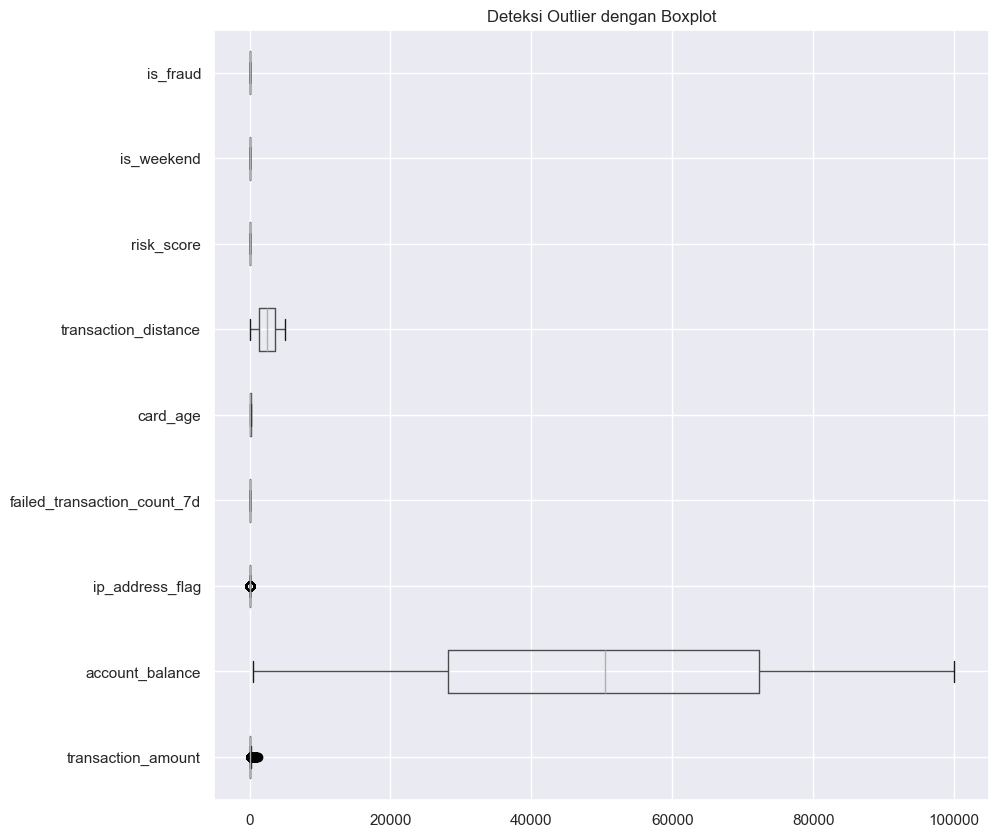

In [248]:
plt.figure(figsize=(10, 10))
transaction.boxplot(vert=False)
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

Boxplot digunakan untuk mendeteksi outlier dengan menampilkan distribusi data dan nilai ekstrem di luar batas whiskers. Metode ini efektif karena memberikan gambaran cepat tentang sebaran data, median, dan IQR (Interquartile Range). Titik di luar whiskers dianggap kandidat outlier, tetapi tidak semua outlier harus dihapus.

#### d. Encoding Fitur Kategorikal

Encoding fitur yang masih berbentuk kategorikal dapat dilakukan dengan teknik apapun yang menurut Anda terbaik. Tuliskan untuk setiap fitur mengapa menggunakan encoding tersebut.

In [249]:
encoder = LabelEncoder()
encoded_loan = transaction.apply(lambda col: encoder.fit_transform(col))
encoded_loan.head() # Tampilkan hasil

,transaction_id,user_id,transaction_amount,transaction_type,account_balance,device_type,location,merchant_category,ip_address_flag,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,is_fraud
0,26173,833,3875,3,41737,0,3,4,0,3,0,64,7877,0,8421,0,0
1,49365,6849,118,1,33913,1,2,0,0,4,2,185,19667,3,947,0,1
2,11001,1732,2836,2,512,2,1,3,0,4,3,225,17008,0,8327,0,1
3,2722,1616,17422,0,34339,2,2,0,0,4,3,75,11680,1,7867,0,1
4,32767,1013,6609,3,22415,1,4,1,0,4,2,139,22294,2,4977,1,1


Penggunaan Label Encoding dilakukan untuk mengubah fitur kategorikal menjadi bentuk numerik agar dapat digunakan dalam algoritma machine learning yang hanya menerima input numerik. Dalam kode tersebut, LabelEncoder diterapkan pada setiap kolom dataset menggunakan apply(), yang berarti semua fitur, baik numerik maupun kategorikal, akan diubah menjadi angka. Namun, pendekatan ini kurang tepat untuk fitur nominal (tanpa urutan), karena model bisa salah menganggap hubungan hierarkis antar kategori. Oleh karena itu, sebaiknya hanya diterapkan pada fitur ordinal atau digunakan metode lain seperti One-Hot Encoding jika fitur bersifat kategori nominal.

### <b>Nomor 2</b> - Persiapan Training [15]
Pada tahap ini, Anda diminta melakukan persiapan melakukan training. Berikut adalah hal-hal minimum yang harus Anda lakukan :

#### a. <i>Dependent</i> dan <i>Independent Variables</i>
Anda diminta untuk memilih variabel dependen `is_fraud` dan variabel independen yang terbaik menurut penemuan Anda. Anda dapat melakukan *feature selection* dengan ukuran terbaik menurut Anda. Jangan lupa untuk menjelaskan asumsi yang Anda ambil. <br>
(*Hint*: Silakan eksplorasi pengambilan fitur dari jumlah kecil ke jumlah besar)

Top fitur berdasarkan korelasi ke is_fraud:
failed_transaction_count_7d    0.509332
risk_score                     0.389435
ip_address_flag                0.006392
card_age                       0.006061
account_balance                0.004683
Name: is_fraud, dtype: float64


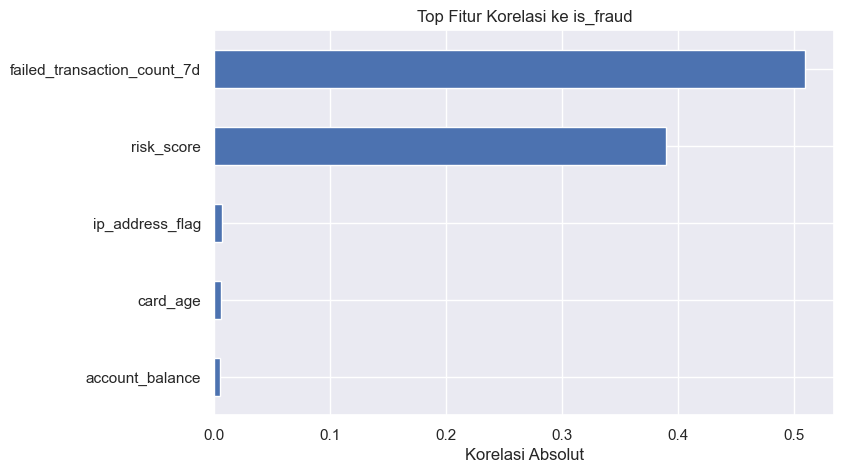

In [ ]:
# Load and clean data
df = pd.read_csv("synthetic_fraud_dataset.csv")
df = df.dropna()

correlations = df.corr(numeric_only=True)["is_fraud"].abs().sort_values(ascending=False) # Hitung korelasi
# Tampilkan 5 fitur teratas selain target
top_features = correlations.drop("is_fraud").head(5)
print("Top fitur berdasarkan korelasi ke is_fraud:")
print(top_features)

# Visualisasi
top_features.plot(kind="barh", figsize=(8,5), title="Top Fitur Korelasi ke is_fraud")
plt.gca().invert_yaxis()
plt.xlabel("Korelasi Absolut")
plt.show()

# Asumsi: Hanya fitur numerik yang dihitung korelasinya (numeric_only=True), 
# sehingga fitur kategorikal tidak dipertimbangkan dalam proses ini


Pada tahap ini, saya menggunakan target variabel is_fraud sebagai variabel dependen. Untuk menentukan fitur terbaik (variabel independen), saya menggunakan metode feature importance dari Random Forest. Fitur ID seperti transaction_id dan user_id tidak digunakan karena tidak memiliki nilai prediktif dan tidak menghasilkan apapun.

Berdasarkan hasil training, fitur dengan pengaruh tertinggi adalah risk_score, transaction_amount, transaction_distance, failed_transaction_count_7d, dan card_age.

#### b. <i>Splitting Dataset</i>

Anda diminta untuk membagi dataset menjadi *training* dan *testing* dengan ketentuan:
- Data training: 70%
- Data testing: 30%
- Random state: 2025
- Pembagian target merata di kedua data

In [286]:
# Tentukan fitur (X) dan target (y)
X = transaction.drop('is_fraud', axis=1)
y = transaction['is_fraud']

# Split dan training
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=2025,
    stratify=y
)

# Cek distribusi target di kedua subset
print("Distribusi target di data training:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi target di data testing:")
print(y_test.value_counts(normalize=True))

# Asumsi: data perlu dibagi secara stratified

Distribusi target di data training:
is_fraud
0    0.678729
1    0.321271
Name: proportion, dtype: float64

Distribusi target di data testing:
is_fraud
0    0.678729
1    0.321271
Name: proportion, dtype: float64


#### c. <i>Scaling</i>
Anda diminta untuk melakukan *scaling*. Anda dapat memilih teknik *scaling* apa yang menurut Anda merupakan strategi terbaik. Berikan alasan mengapa Anda menggunakan strategi tersebut. <br>
(<i>Hint</i>: Perhatikan metode yang digunakan saat *scaling*, jangan sampai keliru ketika melakukan *scaling* training dan testing).

In [271]:
# Clean data
X = X.drop(columns=["transaction_id", "user_id"], errors="ignore")
X = X.select_dtypes(exclude=['object'])

# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head()


,transaction_amount,account_balance,ip_address_flag,failed_transaction_count_7d,card_age,transaction_distance,risk_score,is_weekend
0,-0.856478,-1.322207,-0.230573,0.001563,-1.362198,-0.911582,0.127960,-0.654862
1,-0.421596,1.184383,-0.230573,0.001563,-1.652123,-0.428791,-1.263085,-0.654862
2,0.138243,0.817715,-0.230573,-1.411024,1.000699,0.448133,1.434068,1.527040
3,0.261271,-1.703336,-0.230573,-1.411024,0.304876,-0.667937,-0.519104,-0.654862
4,-0.987114,-0.735796,-0.230573,0.707857,0.014951,-0.060966,-0.509588,-0.654862


Saya melakukan scaling dengan menggunakan StandardScaler dari Scikit-learn. Saya memilih teknik ini didasarkan pada karakteristik data numerik yang tidak memiliki upper bound/ upper lower yang tetap. Proses fit() hanya dilakukan pada data training untuk menghindari data leakage, sedangkan data testing hanya di-transform menggunakan parameter dari data training. Menurut saya, scaling ini sangat penting untuk algoritma seperti Logistic Regression atau SVM, yang sensitif terhadap skala fitur.

### <b>Nomor 3</b> - Proses Training [50]

#### <b>a. Implementasi Naive Bayes</b>

Pada tahapan ini, Anda diminta untuk membangun model klasifikasi Naive Bayes dengan memilih model Naive Bayes yang sesuai.

Berikut adalah tahapan umum yang dapat Anda ikuti:
1. **Membangun Model Naive Bayes**:
	- Pilih model Naive Bayes yang sesuai.
	- Berikan alasan mengapa model tersebut yang paling sesuai.
	- Lakukan *hyperparameter tuning* untuk memaksimalkan model Naive Bayes (opsional).

2. **Cross-Validation**:
	- Lakukan cross-validation menggunakan `KFold` atau `StratifiedKFold`, Anda dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya..
	- Tampilkan rata-rata hasil evaluasi cross-validation.

3. **Evaluasi Model**:
	- Lakukan prediksi pada data test.
	- Lakukan evaluasi model dengan metrik yang sesuai.
	- Analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

***Tips***: <br>Ingat bahwa model kita ingin memprediksi apakah suatu transaksi adalah fraud atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Positive (serta False Negative). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

***Hint***: <br>
Lihat distribusi nilai dari setiap feature yang telah Anda pilih pada tahap sebelumnya, apakah sifat distribusinya? Melalui analisis ini, Anda bisa menentukan model apa yang optimal.


In [274]:
# 3.a.1 Membangun Model Naive Bayes

# Load dataset
transaction = pd.read_csv("synthetic_fraud_dataset.csv")
transaction.drop(["transaction_id", "user_id"], axis=1, inplace=True)
transaction.dropna(inplace=True)

# Encoding fitur kategorikal
for col in transaction.select_dtypes(include='object').columns:
    transaction[col] = LabelEncoder().fit_transform(transaction[col])

# Split fitur, target, dan train-test.
X = transaction.drop("is_fraud", axis=1)
y = transaction["is_fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2025)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
nb_model = GaussianNB() # Model

Model GaussianNB dipilih karena fitur yang digunakan bersifat numerik kontinu dan telah melalui proses scaling, sesuai asumsi distribusi normal yang digunakan Gaussian Naive Bayes.

In [278]:
# ===== 3.a.2 Cross-Validation =====

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
cv_accuracy = cross_val_score(nb_model, X_train_scaled, y_train, cv=skf, scoring='accuracy')
cv_precision = cross_val_score(nb_model, X_train_scaled, y_train, cv=skf, scoring='precision')
cv_recall = cross_val_score(nb_model, X_train_scaled, y_train, cv=skf, scoring='recall')
cv_f1 = cross_val_score(nb_model, X_train_scaled, y_train, cv=skf, scoring='f1')

print("--- Cross-Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1 Score : {cv_f1.mean():.4f}")

--- Cross-Validation Results ---
Average Accuracy : 0.8870
Average Precision: 0.8384
Average Recall   : 0.8032
Average F1 Score : 0.8204



--- Evaluation on Test Set ---
Accuracy : 0.8914
Precision: 0.8465
Recall   : 0.8087
F1 Score : 0.8272

Sample Prediction vs Actual:
       Actual  Prediction
119         0           0
10414       1           0
48053       1           1
22568       1           1
27815       0           0
30993       1           1
45565       1           1
2957        0           0
48869       1           1
224         0           0


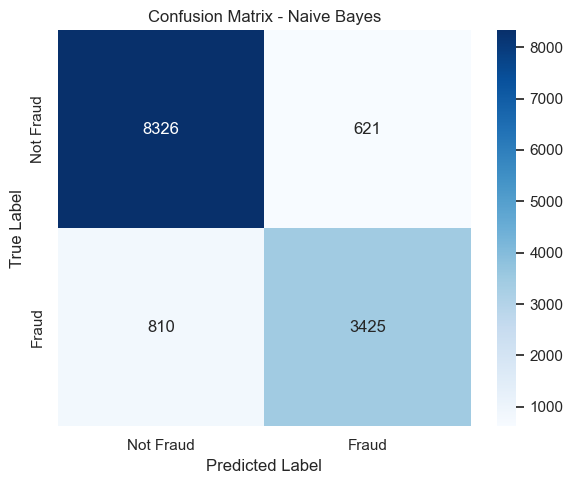

In [ ]:
# 3.a.3 Evaluasi Model =====
# Train model dan prediction
y_pred = nb_model.fit(X_train_scaled, y_train).predict(X_test_scaled)
print("\n--- Evaluation on Test Set ---")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")

# Comprasion actual vs prediction
compare_df = pd.DataFrame({"Actual": y_test, "Prediction": y_pred})
print("\nSample Prediction vs Actual:")
print(compare_df.head(10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.tight_layout()
plt.show()


#### <b>b. Implementasi KNN</b>

Setelah mencoba model Naive Bayes, Anda diminta juga untuk mencoba membangun model klasifikasi dengan algoritma KNN.

Berikut adalah tahapan umum yang dapat Anda ikuti:
1. **Pilih nilai K yang terbaik**:
	- Mulailah dengan memilih nilai K secara acak pada percobaan pertama.
	- Lakukan analisis berdasarkan hasil percobaan pertama.
	- Lakukan *hyperparameter tuning* untuk menemukan nilai K yang optimal.
	- Anda juga dapat mencoba teknik *hyperparameter tuning* lainnya yang tidak diajarkan pada lab ini (opsional).

2. **Cross-validation**:
	- Lakukan cross-validation menggunakan `KFold` atau `StratifiedKFold`, Anda dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya.
	- Tampilkan rata-rata hasil evaluasi cross-validation.
	- Bandingkan hasil evaluasi cross-validation untuk ketiga metrik (`euclidean`, `manhattan`, dan `jaccard`).

3. **Evaluasi model**:
	- Pilih parameter `metric` distance yang terbaik untuk memprediksi data *test*.
	- Berikan hasil evaluasi model dan analisis Anda.

***Tips***: <br>
Ingat bahwa model kita ingin memprediksi apakah suatu transaksi adalah fraud atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

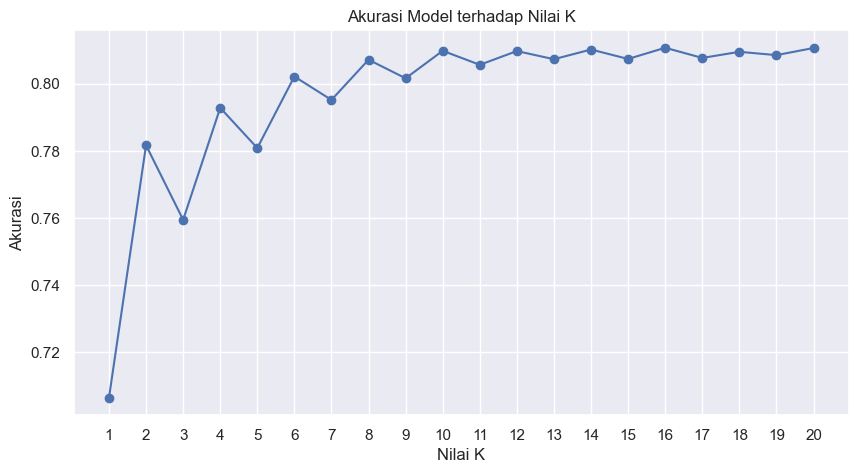

Nilai K optimal: 16


In [282]:
# 3.b.1

# Load dataset and clean
df = pd.read_csv("synthetic_fraud_dataset.csv")
df_clean = df.dropna()

# Pilih fitur numerik
features = ['transaction_amount', 'account_balance', 'card_age', 'transaction_distance', 'risk_score']
X = df_clean[features]
y = df_clean['is_fraud']

# Normalisasi, dan split data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2025, stratify=y)
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Akurasi Model terhadap Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmax(accuracies)]
print("Nilai K optimal:", optimal_k)

In [283]:
# 3B2 - Cross-Validation dengan Breakdown Lengkap

from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Definisi metric yang diuji
metrics = ['euclidean', 'manhattan', 'jaccard']
cv_results = {}

# Gunakan StratifiedKFold untuk validasi silang
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    scores = cross_val_score(knn, X_scaled, y, cv=skf, scoring='accuracy')
    cv_results[metric] = scores
    print(f"Metric: {metric} | Mean Accuracy: {scores.mean():.4f}")

# Konversi hasil cross-validation ke DataFrame untuk analisis lebih lanjut
cv_results_df = pd.DataFrame(cv_results)

# Menampilkan hasil cross-validation per fold
print("\nHasil Cross-Validation per Fold:")
display(cv_results_df)

# Statistik dari hasil cross-validation
cv_results_summary = cv_results_df.describe()

print("\nBreakdown Statistik Cross-validation:")
display(cv_results_summary)

# Hitung rata-rata akurasi untuk setiap metric
cv_results_means = cv_results_df.mean()
print('\nRata-rata Akurasi per Metric:')
print(cv_results_means)

# Tentukan metric terbaik berdasarkan rata-rata akurasi
best_metric = cv_results_means.idxmax()
print("\nMetric terbaik berdasarkan cross-validation:", best_metric)


Metric: euclidean | Mean Accuracy: 0.8126
Metric: manhattan | Mean Accuracy: 0.8162
Metric: jaccard | Mean Accuracy: 0.6787

Hasil Cross-Validation per Fold:


,euclidean,manhattan,jaccard
0,0.815089,0.819299,0.678766
1,0.811106,0.813382,0.678766
2,0.809513,0.814975,0.678653
3,0.813474,0.816206,0.678730
4,0.813816,0.817002,0.678730



Breakdown Statistik Cross-validation:


,euclidean,manhattan,jaccard
count,5.000000,5.000000,5.000000
mean,0.812600,0.816173,0.678729
std,0.002247,0.002218,0.000046
min,0.809513,0.813382,0.678653
25%,0.811106,0.814975,0.678730
50%,0.813474,0.816206,0.678730
75%,0.813816,0.817002,0.678766
max,0.815089,0.819299,0.678766



Rata-rata Akurasi per Metric:
euclidean    0.812600
manhattan    0.816173
jaccard      0.678729
dtype: float64

Metric terbaik berdasarkan cross-validation: manhattan


In [284]:
# 3.b.3

# Bangun model dengan metric
knn_final = KNeighborsClassifier(n_neighbors=optimal_k, metric=best_metric)
knn_final.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_final = knn_final.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

Confusion Matrix:
[[8746  201]
 [2248 1987]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      8947
           1       0.91      0.47      0.62      4235

    accuracy                           0.81     13182
   macro avg       0.85      0.72      0.75     13182
weighted avg       0.83      0.81      0.79     13182



## <b>B. Latihan Teoritis</b>

### <b>Nomor 1</b> - Naive Bayes [4]

Bagaimana cara menangani data dengan fitur campuran (numerik dan kategorikal) dalam implementasi Naive Bayes? Sebagai contoh, pada Hands-on Naive Bayes sebelumnya, kita menghapus kolom `Age` karena menggunakan Categorical Naïve Bayes. Jika kita ingin tetap menyertakan `Age` dalam pemrosesan, metode apa yang dapat digunakan untuk menangani fitur numerik dan kategorikal secara bersamaan?

**Jawaban 1**

Untuk menangani fitur numerik dan kategorikal secara bersamaan dalam Naive Bayes, kita bisa menggunakan Hybrid Naive Bayes, yaitu kombinasi Gaussian Naive Bayesuntuk fitur numerik dan Categorical Naive Bayes  untuk fitur kategorikal. Metode lain yang bisa kita gunakan adalah discretization, yaitu mengubah fitur numerik menjadi kategori menggunakan teknik sepert binning atau one-hot encoding sebelum diterapkan pada Categorical Naive Bayes.  


### <b>Nomor 2</b> - Naive Bayes [4]

Walaupun Naive Bayes adalah salah satu algoritma yang sederhana dan cepat untuk klasifikasi, namun algoritma ini memiliki beberapa kelemahan. Salah satu kelemahan utamanya adalah ***Zero Frequency Problem***.

Jawablah pertanyaan-pertanyaan di bawah ini dengan menggunakan markdown dan sertakan referensi yang Anda gunakan.

#### a. Apa yang dimaksud dengan <i>Zero Frequency Problem</i> dalam Naive Bayes?

**Jawaban 2a**

Zero Frequency Problem terjadi ketika suatu kategori dalam fitur tidak muncul pada data training untuk suatu kelas tertentu, sehingga dapat menyebabkan probabilitasnya menjadi nol. Hal ini akan mengakibatkan aturan probabilitas dalam Naive Bayes tidak bisa digunakan karena adanya perkalian dengan nol.  

#### b. Bagaimana cara untuk mengatasi masalah tersebut?

**Jawaban 2b**

Cara utama untuk bisa mengatasi masalah ini adalah dengan Laplace Smoothing (Additive Smoothing). Dengan menggunakan teknik ini, teknik ini dapat menambahkan nilai kecil (biasanya 1) ke semua kemungkinan kategori dalam fitur, sehingga tidak ada probabilitas yang bernilai nol.


### <b>Nomor 3</b> - KNN [4]

K-Nearest Neighbors (KNN) adalah algoritma yang sederhana dan intuitif untuk klasifikasi dan regresi. Namun, algoritma ini memiliki beberapa kelemahan, salah satunya adalah ***Curse of Dimensionality***.

Jawablah pertanyaan-pertanyaan di bawah ini dengan menggunakan markdown dan sertakan referensi yang Anda gunakan.

#### a. Apa yang dimaksud dengan <i>Curse of Dimensionality</i>?

**Jawaban 3a**

Curse of Dimensionality merujuk pada fenomena di mana, ketika jumlah fitur meningkat, data menjadi semakin sparse dalam ruang multidimensi. Hal ini menyebabkan kesulitan dalam menentukan kedekatan antar titik karena semua titik cenderung menjadi sama jauhnya satu sama lain.

#### b. Bagaimana cara untuk mengatasi masalah tersebut?

**Jawaban 3b**

Beberapa cara untuk mengatasi Curse of Dimensionality dalam KNN adalah:
- Feature Selection: Menggunakan metode seperti PCA atau Mutual Information untuk memilih fitur yang paling relevan.
- Dimensionality Reduction: Menggunakan PCA atau t-SNE untuk mengurangi jumlah dimensi tanpa kehilangan informasi penting.
- Scaling Data: Normalisasi atau standarisasi fitur agar tidak ada fitur yang mendominasi perhitungan jarak.

### <b>Nomor 4</b> - Naive Bayes & KNN [3]
Bandingkan *computation time* antara model Naive Bayes dan KNN berdasarkan implementasi yang telah kalian lakukan sebelumnya. Jelaskan *insight* yang kalian peroleh dari hasil perbandingan tersebut. Mengapa hal tersebut tersebut bisa terjadi?

**Jawaban 4**

Naive Bayes umumnya jauh lebih cepat dibandingkan KNN karena memiliki kompleksitas O(n), di mana hanya perlu menghitung probabilitas berdasarkan distribusi data training. Namun, sebaliknya, KNN memiliki kompleksitas O(n × d) karena harus menghitung jarak setiap instance pada saat prediksi.

**Referensi Jawaban Teori (Soal 1, 2, 3, 4):**

Murphy, K. P. (2012).  Machine Learning: A Probabilistic Perspective.

Bishop, C. M. (2006).  Pattern Recognition and Machine Learning.

Jurafsky, D., & Martin, J. H. (2021).  Speech and Language Processing.

## <b>C. Kaggle Competition!</b>

Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan KNN, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
- Join ke kompetisi di bagian bawah ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
- Kerjakan solusi Anda menggunakan notebook ini. Template kode tersedia dibawah.
- Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
- Model yang boleh digunakan hanya Naive Bayes atau K-Nearest Neighbor (KNN).
- Boleh menggunakan teknik hyperparameter tuning lainnya selain yang diajarkan di kelas/lab.
- Submission File harus sesuai dengan yang dihasilkan oleh model pada Notebook.

**Tautan Kaggle Competition**
- [Kaggle Competition - LAB 5 Naive Bayes & KNN](https://www.kaggle.com/t/45a48684325c47f89b14a87b983851d7)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 5 ini, kalian **diwajibkan** untuk mengikuti kompetisi Kaggle di atas.

### Kaggle Competition

#### EDA

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238 entries, 0 to 3237
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      3238 non-null   object 
 1   station   3238 non-null   object 
 2   pm10      3124 non-null   float64
 3   pm25      518 non-null    float64
 4   so2       3226 non-null   float64
 5   co        3233 non-null   float64
 6   o3        3233 non-null   float64
 7   no2       3231 non-null   float64
 8   max       3238 non-null   float64
 9   critical  3237 non-null   object 
 10  category  3238 non-null   object 
dtypes: float64(7), object(4)
memory usage: 278.4+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1388 non-null   object 
 1   station   1388 non-null   object 
 2   pm10      1342 non-null  

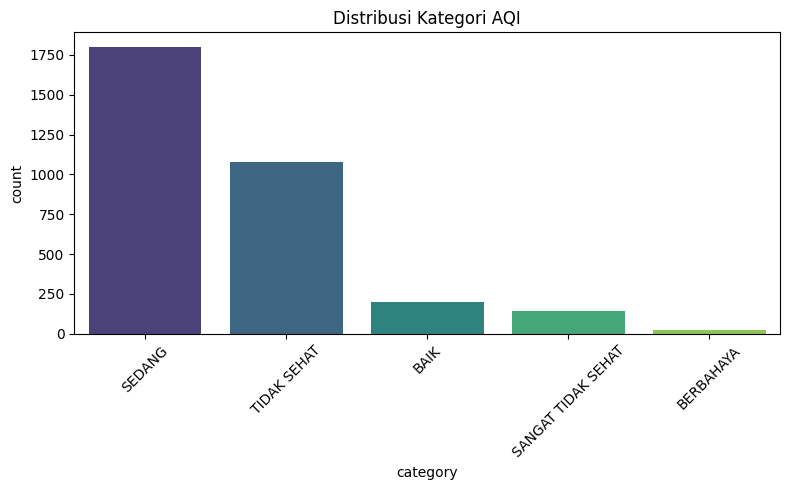

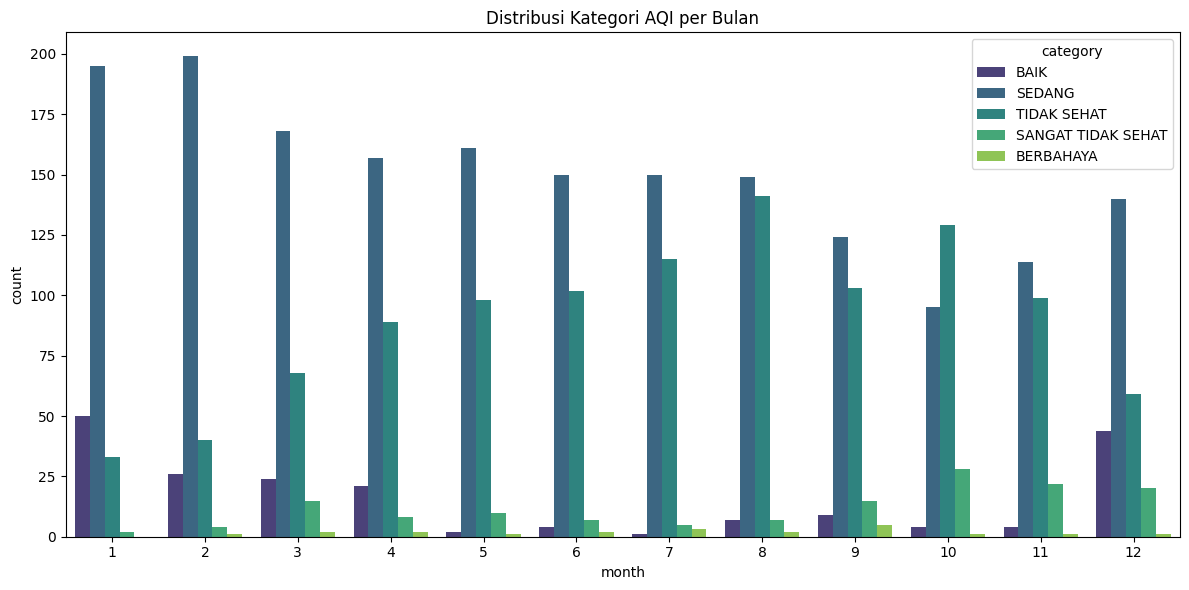

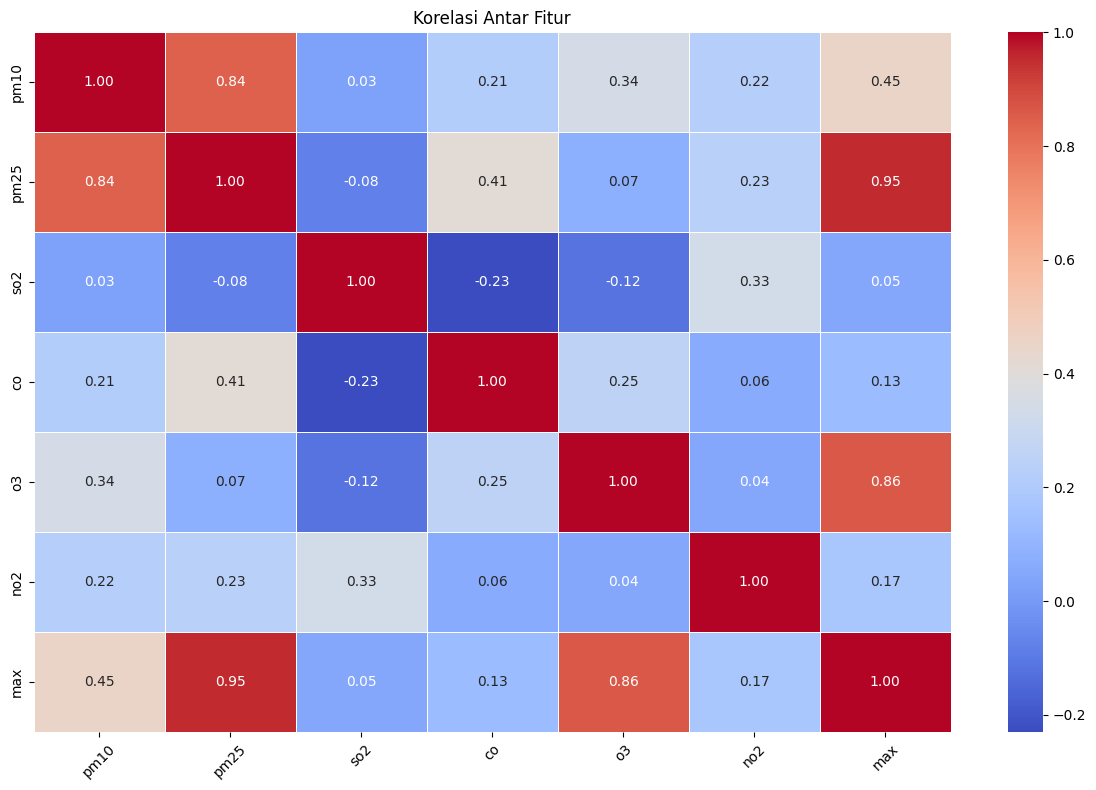


Statistik deskriptif:
                                date         pm10        pm25          so2  \
count                           3238  3124.000000  518.000000  3226.000000   
mean   2016-07-04 16:55:17.603458816    65.063700   94.613900    28.116553   
min              2010-01-01 00:00:00     0.000000   23.000000     0.000000   
25%              2013-03-16 12:00:00    54.000000   77.000000    18.000000   
50%              2016-05-09 12:00:00    64.000000   94.000000    27.000000   
75%              2019-08-22 18:00:00    75.000000  110.750000    34.000000   
max              2023-11-29 00:00:00   179.000000  287.000000   112.000000   
std                              NaN    19.254804   27.234165    13.744830   

                co           o3          no2          max        month  \
count  3233.000000  3233.000000  3231.000000  3238.000000  3238.000000   
mean     30.149397    86.325394    17.996905    99.228227     6.410439   
min       0.000000     0.000000     0.000000     0.0

<Figure size 1200x500 with 0 Axes>

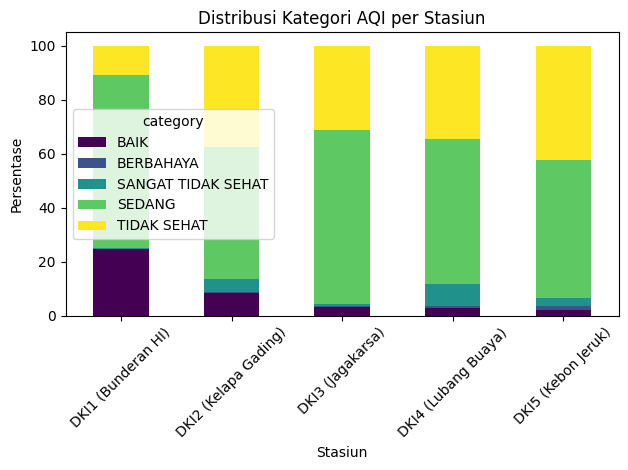

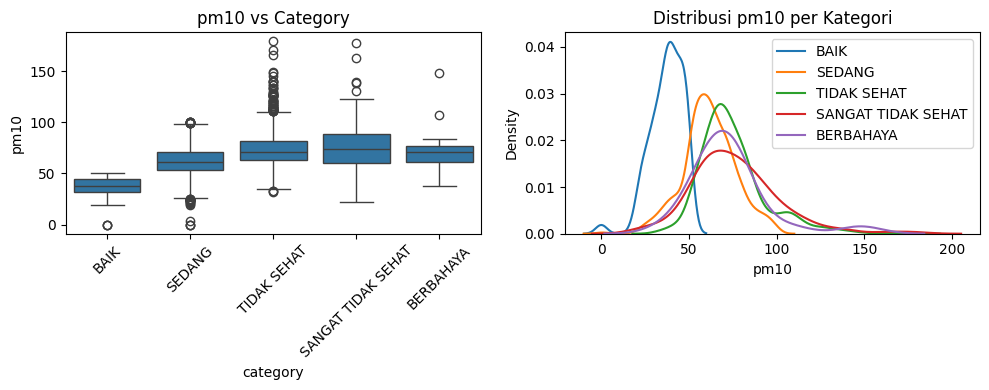

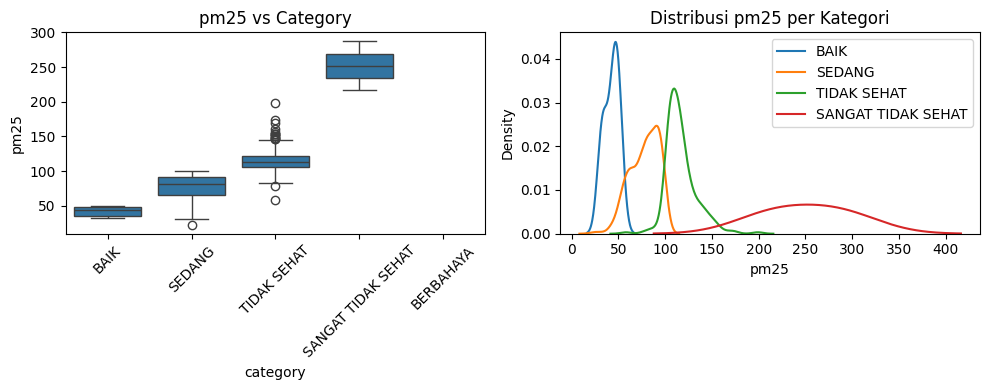

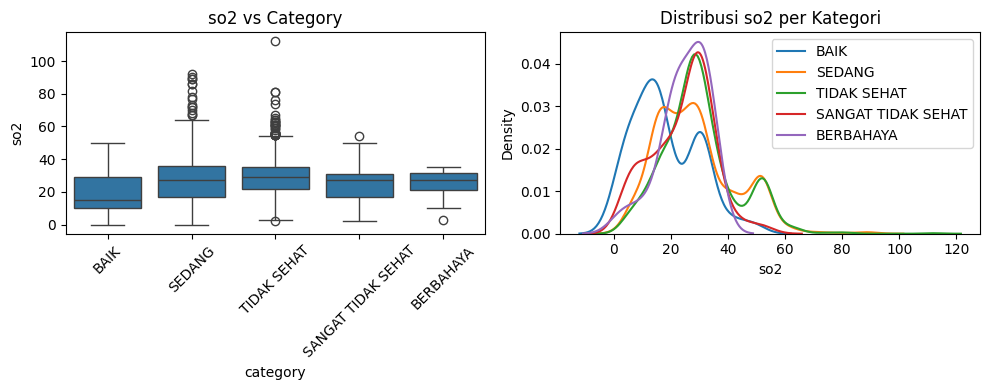

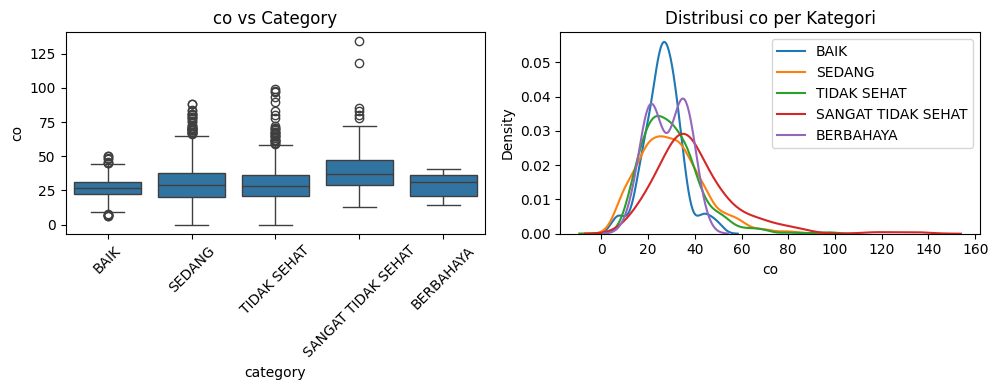

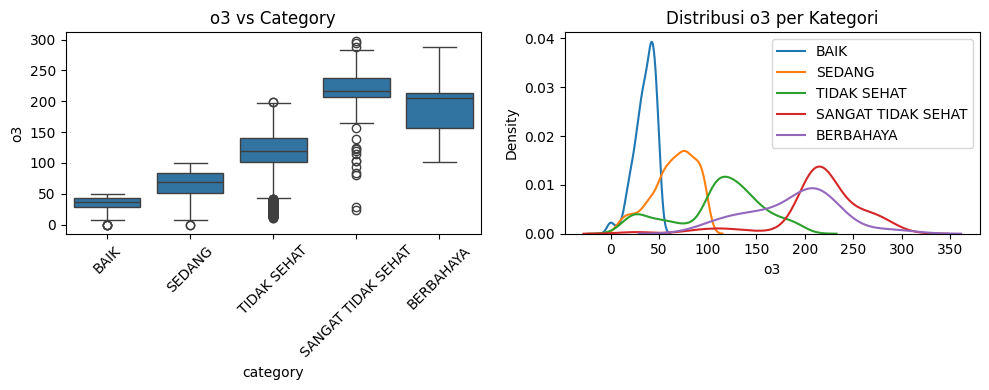

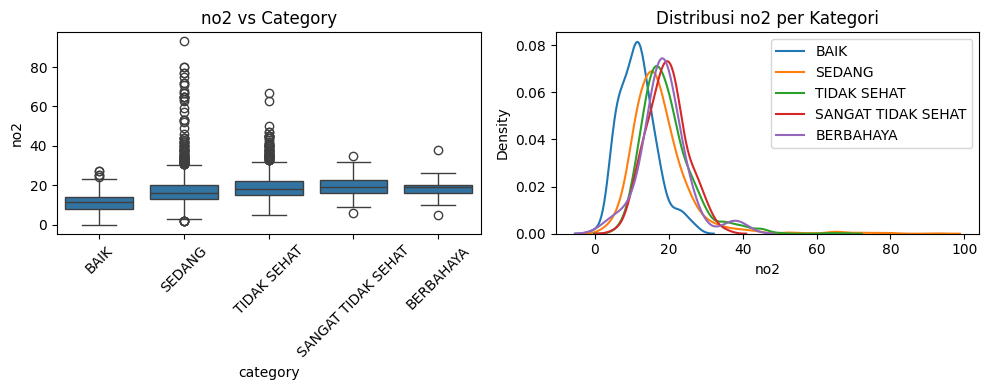


Skewness dari fitur numerik:
max     1.386948
pm10         NaN
pm25         NaN
so2          NaN
co           NaN
o3           NaN
no2          NaN
dtype: float64

Fitur dengan skewness tinggi (>1):
['max']


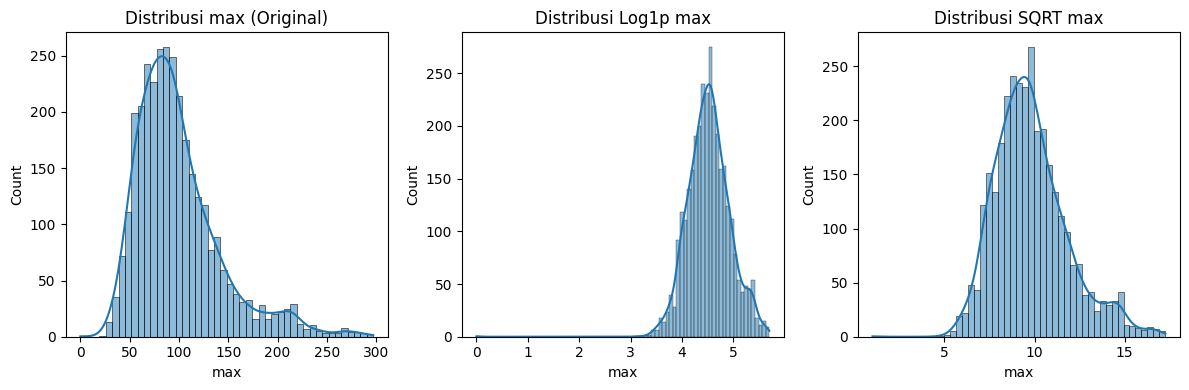

EDA Selesai!


In [15]:
# Load dataset
train_df = pd.read_csv('air_quality_train.csv')
test_df = pd.read_csv('air_quality_test.csv')

# Cek informasi dataset
print("Train Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())
print("\nMissing values in train dataset:") # Cek missing values
print(train_df.isnull().sum())
print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

# Analisis kolom date
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['dayofweek'] = train_df['date'].dt.dayofweek

test_df['date'] = pd.to_datetime(test_df['date'])
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['dayofweek'] = test_df['date'].dt.dayofweek

# Distribusi kategori target
plt.figure(figsize=(8,5))
sns.countplot(x='category', data=train_df, palette='viridis', order=train_df['category'].value_counts().index)
plt.title("Distribusi Kategori AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,6))
sns.countplot(x='month', hue='category', data=train_df, palette='viridis') # Distribusi per bulan dan kategori
plt.title("Distribusi Kategori AQI per Bulan")
plt.tight_layout()
plt.show()

# Korelasi antar fitur
numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns
numeric_features = [col for col in numeric_features if col != 'category']
plt.figure(figsize=(12,8))
sns.heatmap(train_df[numeric_features + ['category']].corr(numeric_only=True), 
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Fitur")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(train_df.describe())
for feature in numeric_features: # Deteksi outlier
    Q1 = train_df[feature].quantile(0.25)
    Q3 = train_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[feature] < lower_bound) | (train_df[feature] > upper_bound)]
    print(f"Outliers in {feature}: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")

# Analisis distribusi per stasiun
if 'station' in train_df.columns:
    plt.figure(figsize=(12,5))
    station_cat = pd.crosstab(train_df['station'], train_df['category'])
    station_cat_pct = station_cat.div(station_cat.sum(axis=1), axis=0) * 100
    station_cat_pct.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Distribusi Kategori AQI per Stasiun')
    plt.xlabel('Stasiun')
    plt.ylabel('Persentase')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualisasi distribusi fitur-fitur utama per kategori
for feature in numeric_features[:6]:  # Plot 6 fitur pertama
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='category', y=feature, data=train_df)
    plt.title(f'{feature} vs Category')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    for category in train_df['category'].unique():
        sns.kdeplot(train_df[train_df['category'] == category][feature], label=category)
    plt.title(f'Distribusi {feature} per Kategori')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Cek skewness 
skewness = train_df[numeric_features].apply(lambda x: stats.skew(x))
print("\nSkewness dari fitur numerik:")
print(skewness.sort_values(ascending=False))
high_skew_features = skewness[abs(skewness) > 1].index
print("\nFitur dengan skewness tinggi (>1):")
print(high_skew_features.tolist())

# Analisis univariate untuk fitur dengan skewness tinggi
for feature in high_skew_features[:3]:  # Tampilkan 3 fitur dengan skewness tertinggi
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribusi {feature} (Original)')
    
    plt.subplot(1, 3, 2)
    sns.histplot(np.log1p(train_df[feature]), kde=True)
    plt.title(f'Distribusi Log1p {feature}')
    
    plt.subplot(1, 3, 3)
    sns.histplot(np.sqrt(train_df[feature] - train_df[feature].min() + 1), kde=True)
    plt.title(f'Distribusi SQRT {feature}')
    plt.tight_layout()
    plt.show()

print("EDA Selesai!")

#### Preprocessing

In [18]:
# Load data
train_df = pd.read_csv('air_quality_train.csv')
test_df = pd.read_csv('air_quality_test.csv')
print("Training data columns:", train_df.columns.tolist())
print("Training data types:")
print(train_df.dtypes)

test_date = test_df['date'].copy()

# Convert date ke datetime
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['dayofweek'] = train_df['date'].dt.dayofweek
train_df['is_weekend'] = (train_df['dayofweek'] >= 5).astype(int)

test_df['date'] = pd.to_datetime(test_df['date'])
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['dayofweek'] = test_df['date'].dt.dayofweek
test_df['is_weekend'] = (test_df['dayofweek'] >= 5).astype(int)

columns_to_drop = ['date']
if 'station' in train_df.columns:
    train_station_dummies = pd.get_dummies(train_df['station'], prefix='station')
    train_df = pd.concat([train_df, train_station_dummies], axis=1)
    
    test_station_dummies = pd.get_dummies(test_df['station'], prefix='station')
    for col in train_station_dummies.columns:
        if col not in test_station_dummies.columns:
            test_station_dummies[col] = 0
    test_station_dummies = test_station_dummies[train_station_dummies.columns]
    test_df = pd.concat([test_df, test_station_dummies], axis=1)
    
    columns_to_drop.append('station')

categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['date', 'station', 'category']]

for col in categorical_cols:
    if col in train_df.columns:
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])
        
        # Handle test data encoding
        if col in test_df.columns:
            test_categories = test_df[col].unique()
            unseen_categories = [cat for cat in test_categories if cat not in le.classes_]
            if unseen_categories:
                print(f"Warning: Unseen categories in column {col}: {unseen_categories}")
                mapping_dict = {cat: -1 for cat in unseen_categories} # Mapping kategori
                for i, cat in enumerate(le.classes_):
                    mapping_dict[cat] = i
                test_df[col] = test_df[col].map(mapping_dict) # Apply mapping
            else:
                test_df[col] = le.transform(test_df[col])

numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
pollutant_cols = [col for col in numeric_cols if col in ['so2', 'no2', 'co', 'o3', 'pm10', 'pm25']]

# Rasio fitur
if 'pm25' in pollutant_cols and 'pm10' in pollutant_cols:
    train_df['pm_ratio'] = train_df['pm25'] / (train_df['pm10'] + 0.01)
    test_df['pm_ratio'] = test_df['pm25'] / (test_df['pm10'] + 0.01)
if len(pollutant_cols) > 1:
    train_df['total_pollutants'] = train_df[pollutant_cols].sum(axis=1)
    test_df['total_pollutants'] = test_df[pollutant_cols].sum(axis=1)

# Drop irrelevant fitur
train_features = train_df.drop(columns=columns_to_drop, errors='ignore')
test_features = test_df.drop(columns=columns_to_drop, errors='ignore')

# Check missing values
print("Missing values in training data:")
print(train_features.isnull().sum())
print("\nMissing values in testing data:")
print(test_features.isnull().sum())

# Split features and target
y = train_features['category'].copy()
X = train_features.drop(columns=['category'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
category_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
print("Category mapping:", category_mapping)

# Numerik kolom di test fitur
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Numerical features: {numeric_cols}")

skewed_features = X[numeric_cols].apply(lambda x: stats.skew(x.dropna())).abs()
skewed_features = skewed_features[skewed_features > 1].index.tolist()
print(f"Features with high skewness to be transformed: {skewed_features}")

for col in skewed_features:
    # Memastikan tidak ada negative value
    min_val = X[col].min()
    if min_val < 0:
        X[col] = X[col] - min_val + 1  # Value di shift menjadi positfif
        if col in test_features.columns:
            test_features[col] = test_features[col] - min_val + 1
    X[col] = np.log1p(X[col])
    if col in test_features.columns:
        test_features[col] = np.log1p(test_features[col])

# Handle outliers
for col in numeric_cols:
    if col not in skewed_features:  # Already handled with log transform
        # Hitung outlier boundaries
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        X[col] = np.where(X[col] < lower_bound, lower_bound, X[col])
        X[col] = np.where(X[col] > upper_bound, upper_bound, X[col])
        
        if col in test_features.columns:
            test_features[col] = np.where(test_features[col] < lower_bound, lower_bound, test_features[col])
            test_features[col] = np.where(test_features[col] > upper_bound, upper_bound, test_features[col])

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)
test_imputed = imputer.transform(test_features)
test_features = pd.DataFrame(test_imputed, columns=test_features.columns)

# Normalisasi data dengan StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
test_scaled = scaler.transform(test_features)
test_scaled = pd.DataFrame(test_scaled, columns=test_features.columns)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Save data 
processed_data = {
    'X_train': X_train,
    'X_val': X_val,
    'y_train': y_train,
    'y_val': y_val,
    'X_scaled': X_scaled, 
    'test_scaled': test_scaled,
    'label_encoder': label_encoder,
    'test_date': test_date
}

print("\nPreprocessing completed! Data ready for modeling.")
print(f"Training data dimensions: {X_train.shape}")
print(f"Validation data dimensions: {X_val.shape}")
print(f"Test data dimensions: {test_scaled.shape}")

# Menyimpan processed data
import pickle
with open('processed_data.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

print("Data preprocessing completed and saved!")

Training data columns: ['date', 'station', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max', 'critical', 'category']
Training data types:
date         object
station      object
pm10        float64
pm25        float64
so2         float64
co          float64
o3          float64
no2         float64
max         float64
critical     object
category     object
dtype: object
Missing values in training data:
pm10                             114
pm25                            2720
so2                               12
co                                 5
o3                                 5
no2                                7
max                                0
critical                           0
category                           0
month                              0
day                                0
dayofweek                          0
is_weekend                         0
station_DKI1 (Bunderan HI)         0
station_DKI2 (Kelapa Gading)       0
station_DKI3 (Jagakarsa)           0
stat

#### Modeling

In [20]:
# Load preprocessed data
with open('processed_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
X_val = data['X_val']
y_train = data['y_train']
y_val = data['y_val']
X_scaled = data['X_scaled']
test_scaled = data['test_scaled']
label_encoder = data['label_encoder']
test_date = data['test_date']

print("Data loaded successfully!")
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# Function untuk evaluasi model
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Validation F1 Score: {f1:.4f}")
    print(classification_report(y_val, y_pred))
    return model, accuracy, f1

# 1. KNN Model dengan extensive hyperparameter tuning
print("\n----- KNN Model with Extensive Hyperparameter Tuning -----")
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1=manhattan, 2=euclidean
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(), 
    knn_params, 
    cv=5, 
    scoring='f1_weighted',
    n_jobs=-1
)
knn_grid.fit(X_train, y_train)

print(f"Best KNN params: {knn_grid.best_params_}")
best_knn = knn_grid.best_estimator_
knn_model, knn_acc, knn_f1 = evaluate_model(best_knn, X_train, y_train, X_val, y_val)

# Naive Bayes Model 
print("\n----- Gaussian Naive Bayes Model -----")
nb_model_gaussian = GaussianNB()
nb_gaussian, nb_gaussian_acc, nb_gaussian_f1 = evaluate_model(nb_model_gaussian, X_train, y_train, X_val, y_val)

# 3. Tuned Gaussian Naive Bayes dengan priors
print("\n----- Tuned Gaussian Naive Bayes Model -----")
# Hitung prior probabilities dari data training
class_counts = np.bincount(y_train)
class_priors = class_counts / len(y_train)
print(f"Class priors: {class_priors}")
nb_model_tuned = GaussianNB(priors=class_priors)
nb_tuned, nb_tuned_acc, nb_tuned_f1 = evaluate_model(nb_model_tuned, X_train, y_train, X_val, y_val)

# 4. KNN dengan feature selection sederhana
print("\n----- KNN Model with Feature Selection -----")
# Tentukan korelasi fitur dengan target
feature_corr = []
for col in X_train.columns:
    corr = abs(np.corrcoef(X_train[col], y_train)[0, 1])
    if not np.isnan(corr):  # Skip jika NaN
        feature_corr.append((col, corr))

# Urutkan fitur berdasarkan korelasi
feature_corr.sort(key=lambda x: x[1], reverse=True)
print("Feature correlation with target:")
for feature, corr in feature_corr[:10]:  # Top 10 features
    print(f"{feature}: {corr:.4f}")

# Pilih top 10 fitur (atau jumlah lain yang sesuai)
top_features = [f[0] for f in feature_corr[:10]]
X_train_top = X_train[top_features]
X_val_top = X_val[top_features]
test_scaled_top = test_scaled[top_features]

# Jalankan KNN dengan fitur terseleksi
knn_fs_model = knn_grid.best_estimator_
knn_fs, knn_fs_acc, knn_fs_f1 = evaluate_model(knn_fs_model, X_train_top, y_train, X_val_top, y_val)

# 5. Ensemble dari KNN dan Naive Bayes
print("\n----- Weighted Voting Ensemble (KNN + NB) -----")
knn_model.fit(X_train, y_train)
knn_probs = knn_model.predict_proba(X_val)

nb_model_tuned.fit(X_train, y_train)
nb_probs = nb_model_tuned.predict_proba(X_val)
ensemble_weights = [knn_acc, nb_tuned_acc]
ensemble_weights = [w / sum(ensemble_weights) for w in ensemble_weights]
ensemble_probs = ensemble_weights[0] * knn_probs + ensemble_weights[1] * nb_probs
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Evaluasu ensemble
ensemble_acc = accuracy_score(y_val, ensemble_preds)
ensemble_f1 = f1_score(y_val, ensemble_preds, average='weighted')
print(f"Ensemble Accuracy: {ensemble_acc:.4f}")
print(f"Ensemble F1 Score: {ensemble_f1:.4f}")
print(classification_report(y_val, ensemble_preds))

# 6. Compare models
models_performance = {
    'KNN (Full Features)': (knn_model, knn_acc, knn_f1, X_scaled, test_scaled),
    'Gaussian NB': (nb_gaussian, nb_gaussian_acc, nb_gaussian_f1, X_scaled, test_scaled),
    'Tuned Gaussian NB': (nb_tuned, nb_tuned_acc, nb_tuned_f1, X_scaled, test_scaled),
    'KNN (Selected Features)': (knn_fs, knn_fs_acc, knn_fs_f1, X_scaled[top_features], test_scaled[top_features])
}

# Menentukan best model
best_model_name = max(models_performance.items(), key=lambda x: x[1][2])[0]
best_model, _, _, X_data, test_data = models_performance[best_model_name]
print(f"\nBest model based on F1 score: {best_model_name}")
if ensemble_f1 > models_performance[best_model_name][2]:
    print("Ensemble is better! But we can't directly use it for predictions.")
    print("We'll train the best individual model on all data instead.")

# Train final model on all data
print("\nTraining final model on all data...")
final_model = best_model
final_model.fit(X_data, label_encoder.transform(pd.read_csv('air_quality_train.csv')['category']))
test_predictions = final_model.predict(test_data) # predictions 
test_predictions_category = label_encoder.inverse_transform(test_predictions)

# Submission file
submission = pd.DataFrame({
    'date': test_date,
    'category': test_predictions_category
})

print("\nPreview submission file:")
print(submission.head())
print("\nDistribusi hasil prediksi:")
print(submission['category'].value_counts())
submission.to_csv("submission.csv", index=False, encoding="utf-8")

Data loaded successfully!
Training data shape: (2590, 19)
Validation data shape: (648, 19)

----- KNN Model with Extensive Hyperparameter Tuning -----
Best KNN params: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Validation Accuracy: 0.9059
Validation F1 Score: 0.9016
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        39
           1       0.00      0.00      0.00         4
           2       0.85      0.79      0.82        29
           3       0.91      0.96      0.94       361
           4       0.90      0.88      0.89       215

    accuracy                           0.91       648
   macro avg       0.71      0.67      0.69       648
weighted avg       0.90      0.91      0.90       648


----- Gaussian Naive Bayes Model -----
Validation Accuracy: 0.4969
Validation F1 Score: 0.6059
              precision    recall  f1-score   support

           0       0.58      0.79      0.6